In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('campaign_performance.csv')
df.head()      #Display first few rows

,dates,campaign_name,campaign_start_date,creative_name,total_spent,impressions,clicks,click_through_rate,leads,platform,adset_name
0,4/29/2024,USP_Search_APTNTSKA_250124,NaN,--,"6,766.15","1,250",220,17.60%,25.0,Google,GMAT/GRE
1,5/2/2024,USP_2_Lead-gen-2_Top4-states_050424,NaN,#7 ( Graphic ) - Get A Free Pass,946.38,3154,9,0.28535193,1.0,Facebook,USP-2_KA_TN_050424
2,5/2/2024,USP_2_Lead-gen-2_Top4-states_050424,NaN,USP_S3_never-been-easier,170.4,2695,8,0.29684601,0.0,Facebook,USP-2_KA_TN_050424
3,5/2/2024,USP_2_Lead-gen-2_Top4-states_050424,NaN,USP_S4_Do-you-have,55.65,577,2,0.34662045,0.0,Facebook,USP-2_KA_TN_050424
4,5/2/2024,USP_2_Lead-gen-2_Top4-states_050424,NaN,USP_S1_We-guarantee,296.94,1466,10,0.68212824,1.0,Facebook,USP-2_AP_TS_050424


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28534 entries, 0 to 28533
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dates                28534 non-null  object 
 1   campaign_name        28534 non-null  object 
 2   campaign_start_date  4247 non-null   object 
 3   creative_name        28534 non-null  object 
 4   total_spent          28534 non-null  object 
 5   impressions          28534 non-null  object 
 6   clicks               28534 non-null  object 
 7   click_through_rate   28497 non-null  object 
 8   leads                28534 non-null  float64
 9   platform             28534 non-null  object 
 10  adset_name           24287 non-null  object 
dtypes: float64(1), object(10)
memory usage: 2.4+ MB


In [85]:
df.columns

Index(['dates', 'campaign_name', 'campaign_start_date', 'creative_name',
       'total_spent', 'impressions', 'clicks', 'click_through_rate', 'leads',
       'platform', 'adset_name'],
      dtype='object')

In [3]:
null_percentages = df.isnull().mean() * 100

print("Percentage of null values in each field:")
print(null_percentages)
df.isnull().sum()

Percentage of null values in each field:
dates                   0.000000
campaign_name           0.000000
campaign_start_date    85.116002
creative_name           0.000000
total_spent             0.000000
impressions             0.000000
clicks                  0.000000
click_through_rate      0.129670
leads                   0.000000
platform                0.000000
adset_name             14.883998
dtype: float64


dates                      0
campaign_name              0
campaign_start_date    24287
creative_name              0
total_spent                0
impressions                0
clicks                     0
click_through_rate        37
leads                      0
platform                   0
adset_name              4247
dtype: int64

In [4]:
#Total duplicates
df.duplicated().sum()

0

In [29]:
# Drop the 'campaign_start_date' column
cleaned_df = df.drop(columns=['campaign_start_date'])

# Display the first few rows of the cleaned data
print(cleaned_df.head())

# Display the columns
print("Columns in the cleaned DataFrame:")
print(cleaned_df.columns)

       dates                        campaign_name  \
0  4/29/2024           USP_Search_APTNTSKA_250124   
1   5/2/2024  USP_2_Lead-gen-2_Top4-states_050424   
2   5/2/2024  USP_2_Lead-gen-2_Top4-states_050424   
3   5/2/2024  USP_2_Lead-gen-2_Top4-states_050424   
4   5/2/2024  USP_2_Lead-gen-2_Top4-states_050424   

                      creative_name total_spent impressions clicks  \
0                                --    6,766.15       1,250    220   
1  #7 ( Graphic ) - Get A Free Pass      946.38        3154      9   
2          USP_S3_never-been-easier       170.4        2695      8   
3                USP_S4_Do-you-have       55.65         577      2   
4               USP_S1_We-guarantee      296.94        1466     10   

  click_through_rate  leads  platform          adset_name  
0             17.60%   25.0    Google            GMAT/GRE  
1         0.28535193    1.0  Facebook  USP-2_KA_TN_050424  
2         0.29684601    0.0  Facebook  USP-2_KA_TN_050424  
3         0.34662045

In [6]:
# Identifying the campaigns that have null adset_name values
null_adset_campaigns = cleaned_df[cleaned_df['adset_name'].isnull()]['campaign_name'].value_counts()

# Display the top campaigns with null adset_name
print("Top campaigns with null adset_name values:")
print(null_adset_campaigns.head(10))

# Performance metrics - Total_spent, impressions, clicks, and leads for campaigns with null adset_name
null_adset_performance = cleaned_df[cleaned_df['adset_name'].isnull()][['campaign_name', 'total_spent', 'impressions', 'clicks', 'leads']]

# Summarize the performance metrics
performance_summary = null_adset_performance.groupby('campaign_name').sum().reset_index()

# Display the performance summary
print("Performance summary for campaigns with null adset_name:")
print(performance_summary)

Top campaigns with null adset_name values:
campaign_name
US_Pathway_2_Lead_gen_3_241123    1428
US_Pathway_2_Lead_gen_1_091123    1395
US_Pathway_2_Lead_gen_2_091123    1190
US_Pathway_2_Lead_gen_4_220324     234
Name: count, dtype: int64
Performance summary for campaigns with null adset_name:
                    campaign_name  \
0  US_Pathway_2_Lead_gen_1_091123   
1  US_Pathway_2_Lead_gen_2_091123   
2  US_Pathway_2_Lead_gen_3_241123   
3  US_Pathway_2_Lead_gen_4_220324   

                                         total_spent  \
0  3,424.731,140.491,970.07124.22304.75149580.62,...   
1  484.92790.932,642.11028.340271.38543.5286.422,...   
2  54.47120.5545.51386.552,459.4817.3817.21497.46...   
3  475.11655.881,028.35104.88364.22529.14236.4211...   

                                         impressions  \
0  9591228554831267454721752128353973844154420956...   
1  3482209584807502976148114468812206914040321954...   
2  1092122086717821272761529012160543184459824392...   
3  11923065363

In [7]:
#No. of null values in click_through_rate
null_ctr_rows = cleaned_df[cleaned_df['click_through_rate'].isnull()]
print("Number of rows with null click-through rate:", len(null_ctr_rows))

Number of rows with null click-through rate: 37


In [8]:
print("Sample of rows with null click-through rate:")
print(null_ctr_rows[['campaign_name', 'adset_name', 'impressions', 'clicks', 'click_through_rate']].head())


Sample of rows with null click-through rate:
            campaign_name                                    adset_name  \
677    USP_Webinar_070324  All India Look-a-like of form fillers 180324   
1462   USP_Webinar_070324              All India Counselling RET_180324   
2996  USP_Webinar2_270324                      All India Webinar_270324   
3069  USP_Webinar2_270324                      All India Webinar_270324   
5063   USP_Webinar_070324             All India test aud Webinar_200324   

     impressions clicks click_through_rate  
677            0      0                NaN  
1462           0      0                NaN  
2996           0      0                NaN  
3069           0      0                NaN  
5063           0      0                NaN  


In [9]:
cleaned_df['impressions'] = cleaned_df['impressions'].astype(str).str.replace(',', '').astype(int)
cleaned_df['clicks'] = cleaned_df['clicks'].astype(str).str.replace(',', '').astype(int)


In [10]:
cleaned_df['click_through_rate'] = cleaned_df['click_through_rate'].str.replace('%', '').astype(float)
cleaned_df.head()

,dates,campaign_name,creative_name,total_spent,impressions,clicks,click_through_rate,leads,platform,adset_name
0,4/29/2024,USP_Search_APTNTSKA_250124,--,"6,766.15",1250,220,17.600000,25.0,Google,GMAT/GRE
1,5/2/2024,USP_2_Lead-gen-2_Top4-states_050424,#7 ( Graphic ) - Get A Free Pass,946.38,3154,9,0.285352,1.0,Facebook,USP-2_KA_TN_050424
2,5/2/2024,USP_2_Lead-gen-2_Top4-states_050424,USP_S3_never-been-easier,170.4,2695,8,0.296846,0.0,Facebook,USP-2_KA_TN_050424
3,5/2/2024,USP_2_Lead-gen-2_Top4-states_050424,USP_S4_Do-you-have,55.65,577,2,0.346620,0.0,Facebook,USP-2_KA_TN_050424
4,5/2/2024,USP_2_Lead-gen-2_Top4-states_050424,USP_S1_We-guarantee,296.94,1466,10,0.682128,1.0,Facebook,USP-2_AP_TS_050424


In [11]:
cleaned_df['click_through_rate'] = (cleaned_df['clicks'] / cleaned_df['impressions']) * 100
cleaned_df.head()

,dates,campaign_name,creative_name,total_spent,impressions,clicks,click_through_rate,leads,platform,adset_name
0,4/29/2024,USP_Search_APTNTSKA_250124,--,"6,766.15",1250,220,17.600000,25.0,Google,GMAT/GRE
1,5/2/2024,USP_2_Lead-gen-2_Top4-states_050424,#7 ( Graphic ) - Get A Free Pass,946.38,3154,9,0.285352,1.0,Facebook,USP-2_KA_TN_050424
2,5/2/2024,USP_2_Lead-gen-2_Top4-states_050424,USP_S3_never-been-easier,170.4,2695,8,0.296846,0.0,Facebook,USP-2_KA_TN_050424
3,5/2/2024,USP_2_Lead-gen-2_Top4-states_050424,USP_S4_Do-you-have,55.65,577,2,0.346620,0.0,Facebook,USP-2_KA_TN_050424
4,5/2/2024,USP_2_Lead-gen-2_Top4-states_050424,USP_S1_We-guarantee,296.94,1466,10,0.682128,1.0,Facebook,USP-2_AP_TS_050424


In [46]:
cleaned_df['adset_name'] = cleaned_df['adset_name'].fillna('Not Defined')
print(cleaned_df['adset_name'])


1                           USP-2_KA_TN_050424
2                           USP-2_KA_TN_050424
3                           USP-2_KA_TN_050424
4                           USP-2_AP_TS_050424
5                           USP-2_AP_TS_050424
                         ...                  
28529          MS + Coop KA&TN Ad set - 240224
28530      MS + Coop All India Ad set - 240224
28531        AP&TS Generic Leads Ad Set_240224
28532        KA&TN Generic Leads Ad Set_240224
28533    All India Generic Leads Ad Set_240224
Name: adset_name, Length: 26610, dtype: object


In [45]:
cleaned_df.dropna(subset=['total_spent', 'click_through_rate'], inplace=True)


In [42]:
cleaned_df['total_spent'] = cleaned_df['total_spent'].replace(',', '', regex=False)
cleaned_df['total_spent'] = pd.to_numeric(cleaned_df['total_spent'], errors='coerce')


In [16]:
# Calculate mean and median
mean_total_spent = cleaned_df['total_spent'].mean()
median_total_spent = cleaned_df['total_spent'].median()
print("Mean: ", mean_total_spent)
print("Median: ", median_total_spent)

Mean:  378.26128114150544
Median:  43.08


EDA (Exploratory Data Analysis)

Handling Outliers

In [84]:
clicks_stats = cleaned_df['clicks'].describe()
impressions_stats = cleaned_df['impressions'].describe()
total_spent_stats = cleaned_df['total_spent'].describe()
leads_stats = cleaned_df['leads'].describe()
print("Clicks Summary Statistics:\n", clicks_stats)
print("\nImpressions Summary Statistics:\n", impressions_stats)
print("\nTotal Spent Summary Statistics:\n", total_spent_stats)
print("\nLeads Summary Statistics: \n", leads_stats)

Clicks Summary Statistics:
 count    6687.000000
mean       37.092119
std        65.633346
min         1.000000
25%         6.000000
50%        15.000000
75%        39.000000
max      1180.000000
Name: clicks, dtype: float64

Impressions Summary Statistics:
 count      6687.000000
mean       5936.888889
std       12507.801962
min           1.000000
25%         385.500000
50%        2009.000000
75%        6233.500000
max      196585.000000
Name: impressions, dtype: float64

Total Spent Summary Statistics:
 count     6687.000000
mean      1213.503179
std       1841.303092
min          0.110000
25%        244.080000
50%        564.370000
75%       1374.835000
max      23593.240000
Name: total_spent, dtype: float64

Leads Summary Statistics: 
 count    6687.000000
mean        4.201349
std         6.841682
min         0.180000
25%         1.000000
50%         2.000000
75%         4.000000
max       153.000000
Name: leads, dtype: float64


In [19]:
# Calculate Q1, Q3, and IQR
Q1 = cleaned_df['total_spent'].quantile(0.25)
Q3 = cleaned_df['total_spent'].quantile(0.75)
IQR = Q3 - Q1

# Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = cleaned_df[(cleaned_df['total_spent'] < lower_bound) | (cleaned_df['total_spent'] > upper_bound)]

num_outliers = outliers.shape[0]

print("Outliers in total_spent:", num_outliers)
print("Outliers: ")
print(outliers)

Outliers in total_spent: 3207
Outliers: 
            dates                        campaign_name  \
1        5/2/2024  USP_2_Lead-gen-2_Top4-states_050424   
7        5/2/2024      USP Study Abroad_Generic_240224   
17       5/4/2024      USP Study Abroad_Generic_240224   
24       5/4/2024      USP Study Abroad_Generic_240224   
30       5/4/2024      USP Study Abroad_Generic_240224   
...           ...                                  ...   
28488   3/27/2024       US_Pathway_2_Lead_gen_3_241123   
28503   3/28/2024        USP_MS + Coop Campaign_240224   
28511   3/14/2024      USP Study Abroad_Generic_240224   
28516  11/17/2023       US_Pathway_2_Lead_gen_2_091123   
28517  11/19/2023       US_Pathway_2_Lead_gen_2_091123   

                                    creative_name  total_spent  impressions  \
1                #7 ( Graphic ) - Get A Free Pass       946.38         3154   
7                      USP_kavita&steffi_VideoAd6      1201.92         3056   
17                     US

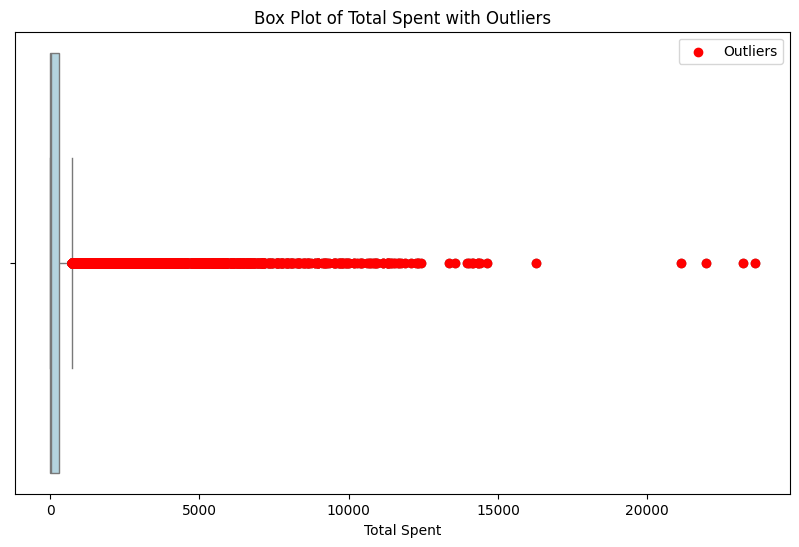

In [20]:
# Plot
plt.figure(figsize=(10, 6))

# Box plot to visualize outliers
sns.boxplot(x=cleaned_df['total_spent'], color='lightblue')

# Overlay outliers on the box plot
plt.scatter(outliers['total_spent'], [0]*len(outliers), color='red', label='Outliers', zorder=5)

plt.title('Box Plot of Total Spent with Outliers')
plt.xlabel('Total Spent')
plt.legend()
plt.show()

In [21]:
# Calculate Q1, Q3, and IQR
Q1 = cleaned_df['impressions'].quantile(0.25)
Q3 = cleaned_df['impressions'].quantile(0.75)
IQR = Q3 - Q1

# Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = cleaned_df[(cleaned_df['impressions'] < lower_bound) | (cleaned_df['impressions'] > upper_bound)]

# Number of outliers
num_outliers = outliers.shape[0]

print("Number of outliers in 'impressions':", num_outliers)
print("Outliers:")
print(outliers)

Number of outliers in 'impressions': 4510
Outliers:
            dates                        campaign_name  \
6        5/2/2024  USP_2_Lead-gen-2_Top4-states_050424   
17       5/4/2024      USP Study Abroad_Generic_240224   
30       5/4/2024      USP Study Abroad_Generic_240224   
37       5/4/2024              USP_2_Lead-gen-1_220124   
43       5/4/2024  USP_2_Lead-gen-2_Top4-states_050424   
...           ...                                  ...   
28494  12/18/2023       US_Pathway_2_Lead_gen_3_241123   
28496   2/23/2024   USP_Video_APTLTSKA_Lead-Gen_160224   
28497   3/22/2024       US_Pathway_2_Lead_gen_3_241123   
28525   3/12/2024       US_Pathway_2_Lead_gen_1_091123   
28527    3/9/2024       US_Pathway_2_Lead_gen_1_091123   

                                        creative_name  total_spent  \
6                            USP_S3_never-been-easier       191.13   
17                         USP_kavita&steffi_VideoAd6      1246.20   
30                  #8 ( Graphic ) - Stud

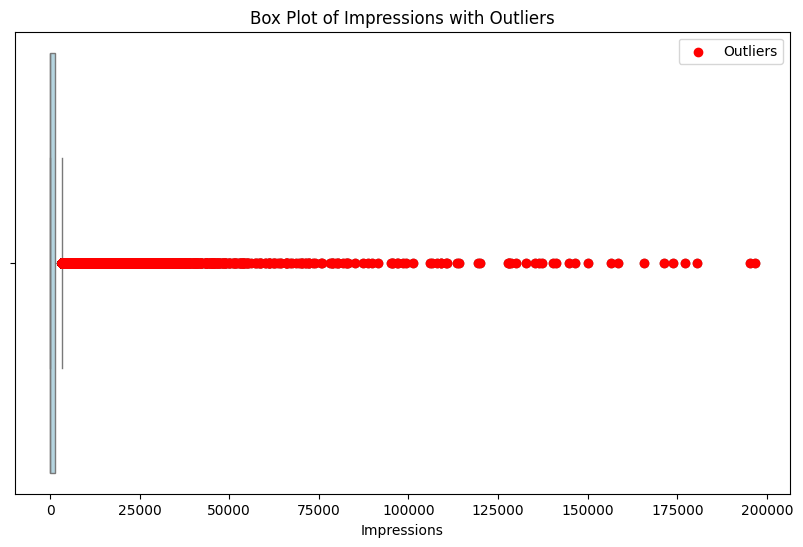

In [22]:
# Plot
plt.figure(figsize=(10, 6))

# Box plot to visualize outliers
sns.boxplot(x=cleaned_df['impressions'], color='lightblue')

# Overlay outliers on the box plot
plt.scatter(outliers['impressions'], [0]*len(outliers), color='red', label='Outliers', zorder=5)
plt.title('Box Plot of Impressions with Outliers')
plt.xlabel('Impressions')
plt.legend()
plt.show()

In [23]:
# Calculate Q1, Q3, and IQR
Q1 = cleaned_df['clicks'].quantile(0.25)
Q3 = cleaned_df['clicks'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = cleaned_df[(cleaned_df['clicks'] < (Q1 - 1.5 * IQR)) | (cleaned_df['clicks'] > (Q3 + 1.5 * IQR))]

# Number of outliers
num_outliers = outliers.shape[0]

print("Number of outliers in 'clicks':", num_outliers)
print("Outliers:")
print(outliers)

Number of outliers in 'clicks': 4424
Outliers:
           dates                    campaign_name  \
0      4/29/2024       USP_Search_APTNTSKA_250124   
7       5/2/2024  USP Study Abroad_Generic_240224   
17      5/4/2024  USP Study Abroad_Generic_240224   
24      5/4/2024  USP Study Abroad_Generic_240224   
31      5/4/2024  USP Study Abroad_Generic_240224   
...          ...                              ...   
28497  3/22/2024   US_Pathway_2_Lead_gen_3_241123   
28509   3/9/2024       USP_Search_APTNTSKA_250124   
28525  3/12/2024   US_Pathway_2_Lead_gen_1_091123   
28526  3/13/2024       USP_Search_APTNTSKA_250124   
28527   3/9/2024   US_Pathway_2_Lead_gen_1_091123   

                                      creative_name  total_spent  impressions  \
0                                                --          NaN         1250   
7                        USP_kavita&steffi_VideoAd6      1201.92         3056   
17                       USP_kavita&steffi_VideoAd6      1246.20         

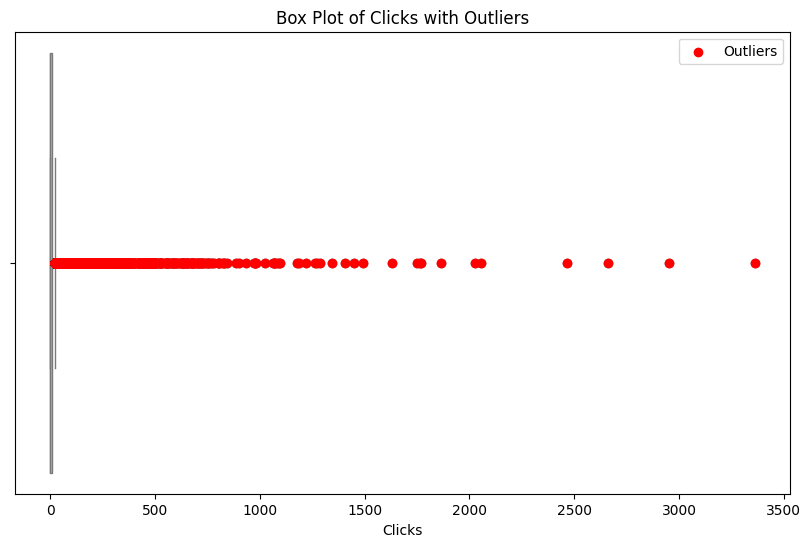

In [24]:
# Plot
plt.figure(figsize=(10, 6))

# Box plot to visualize outliers
sns.boxplot(x=cleaned_df['clicks'], color='lightblue')

# Overlay outliers on the box plot
plt.scatter(outliers['clicks'], [0]*len(outliers), color='red', label='Outliers', zorder=5)

plt.title('Box Plot of Clicks with Outliers')
plt.xlabel('Clicks')
plt.legend()
plt.show()

In [25]:
# Calculate Q1, Q3, and IQR
Q1 = cleaned_df['leads'].quantile(0.25)
Q3 = cleaned_df['leads'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = cleaned_df[(cleaned_df['leads'] < (Q1 - 1.5 * IQR)) | (cleaned_df['leads'] > (Q3 + 1.5 * IQR))]

# Number of outliers
num_outliers = outliers.shape[0]

print("Number of outliers in 'leads':", num_outliers)
print("Outliers:")
print(outliers)

Number of outliers in 'leads': 3242
Outliers:
            dates                    campaign_name  \
0       4/29/2024       USP_Search_APTNTSKA_250124   
7        5/2/2024  USP Study Abroad_Generic_240224   
19       5/4/2024  USP Study Abroad_Generic_240224   
24       5/4/2024  USP Study Abroad_Generic_240224   
31       5/4/2024  USP Study Abroad_Generic_240224   
...           ...                              ...   
28434   3/20/2024               USP_Webinar_070324   
28483  12/27/2023   US_Pathway_2_Lead_gen_1_091123   
28484  12/28/2023   US_Pathway_2_Lead_gen_1_091123   
28526   3/13/2024       USP_Search_APTNTSKA_250124   
28527    3/9/2024   US_Pathway_2_Lead_gen_1_091123   

                                     creative_name  total_spent  impressions  \
0                                               --          NaN         1250   
7                       USP_kavita&steffi_VideoAd6      1201.92         3056   
19                             USP_S1_We-guarantee       379.82  

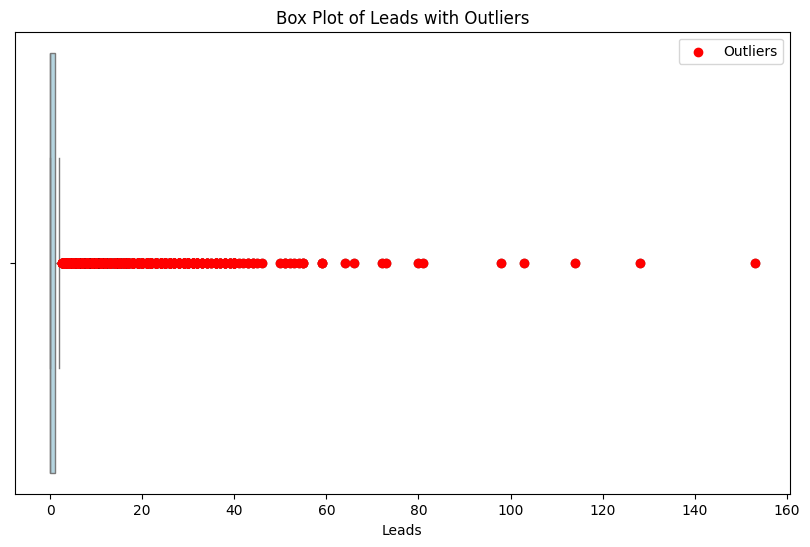

In [26]:
# Plot
plt.figure(figsize=(10, 6))

# Box plot to visualize outliers
sns.boxplot(x=cleaned_df['leads'], color='lightblue')

# Overlay outliers on the box plot
plt.scatter(outliers['leads'], [0]*len(outliers), color='red', label='Outliers', zorder=5)

plt.title('Box Plot of Leads with Outliers')
plt.xlabel('Leads')
plt.legend()
plt.show()

Bivariate Analysis

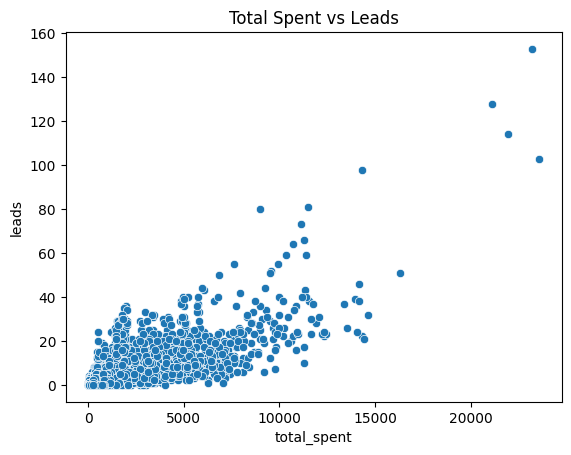

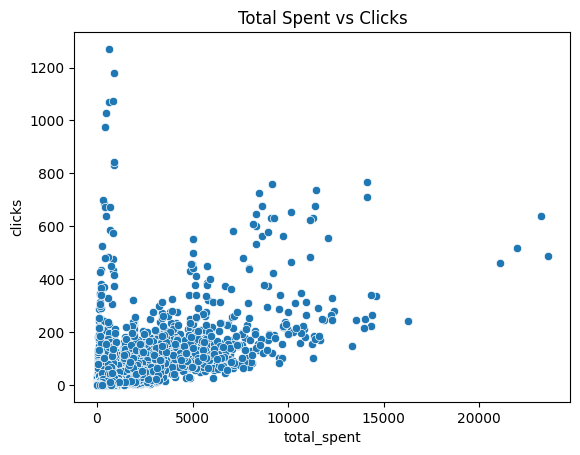

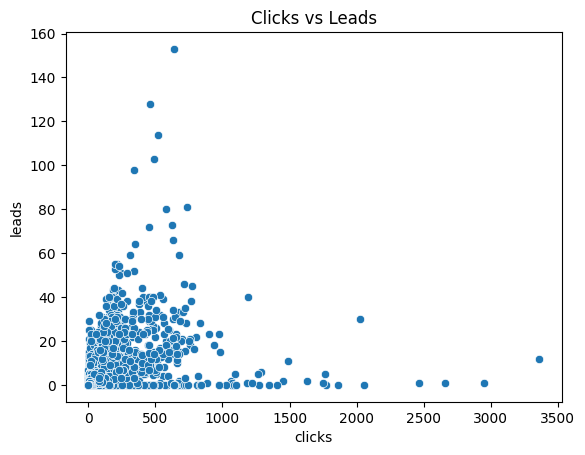

By visualizing these relationships, the scatterplots provide a graphical confirmation of the correlations.


In [20]:
# Bivariate Analysis
sns.scatterplot(data=cleaned_df, x='total_spent', y='leads')
plt.title('Total Spent vs Leads')
plt.show()

sns.scatterplot(data=cleaned_df, x='total_spent', y='clicks')
plt.title('Total Spent vs Clicks')
plt.show()

sns.scatterplot(data=cleaned_df, x='clicks', y='leads')
plt.title('Clicks vs Leads')
plt.show()

print("By visualizing these relationships, the scatterplots provide a graphical confirmation of the correlations.")



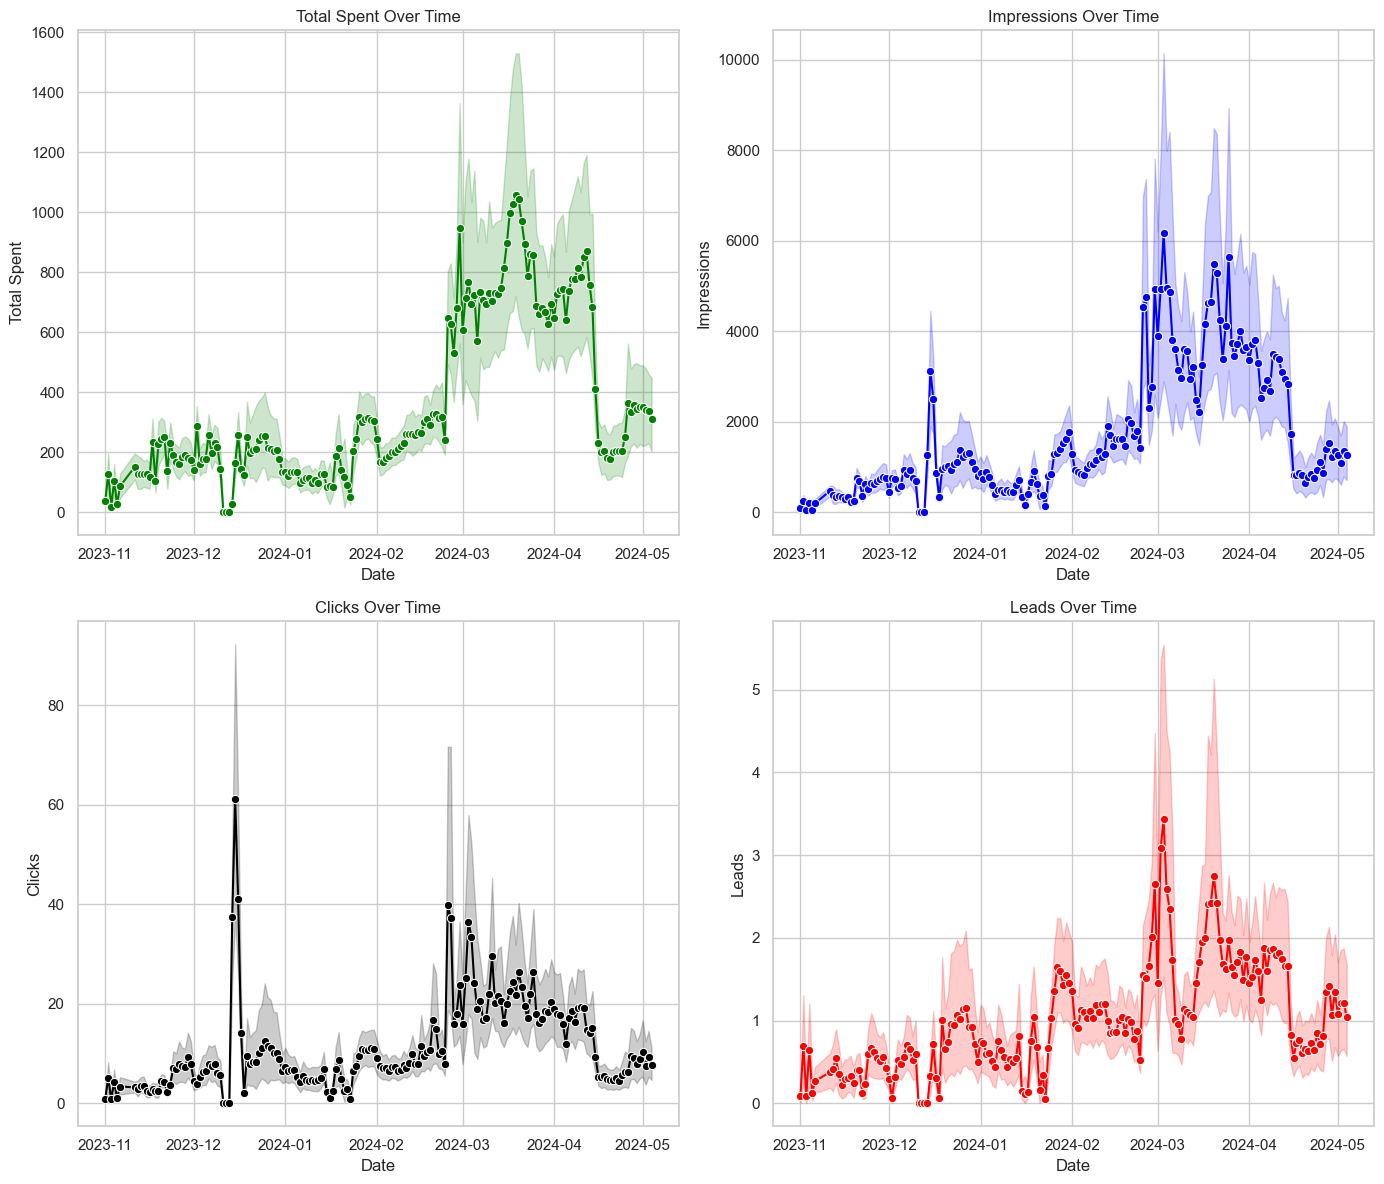

These line charts shows the key metrics according to dates or over a time-period


In [199]:
sns.set(style="whitegrid")

# Plotting each metric over time in separate subplots in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Total Spent
sns.lineplot(ax=axs[0, 0], x='dates', y='total_spent', data=cleaned_df, marker='o', color='green')
axs[0, 0].set_title('Total Spent Over Time')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Total Spent')
axs[0, 0].grid(True)

# Impressions
sns.lineplot(ax=axs[0, 1], x='dates', y='impressions', data=cleaned_df, marker='o', color='blue')
axs[0, 1].set_title('Impressions Over Time')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Impressions')
axs[0, 1].grid(True)

# Clicks
sns.lineplot(ax=axs[1, 0], x='dates', y='clicks', data=cleaned_df, marker='o', color='black')
axs[1, 0].set_title('Clicks Over Time')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Clicks')
axs[1, 0].grid(True)

# Leads
sns.lineplot(ax=axs[1, 1], x='dates', y='leads', data=cleaned_df, marker='o', color='red')
axs[1, 1].set_title('Leads Over Time')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Leads')
axs[1, 1].grid(True)

# Adjusting layout to avoid overlap
plt.tight_layout()
plt.show()

print("These line charts shows the key metrics according to dates or over a time-period")

Multivariate Analysis

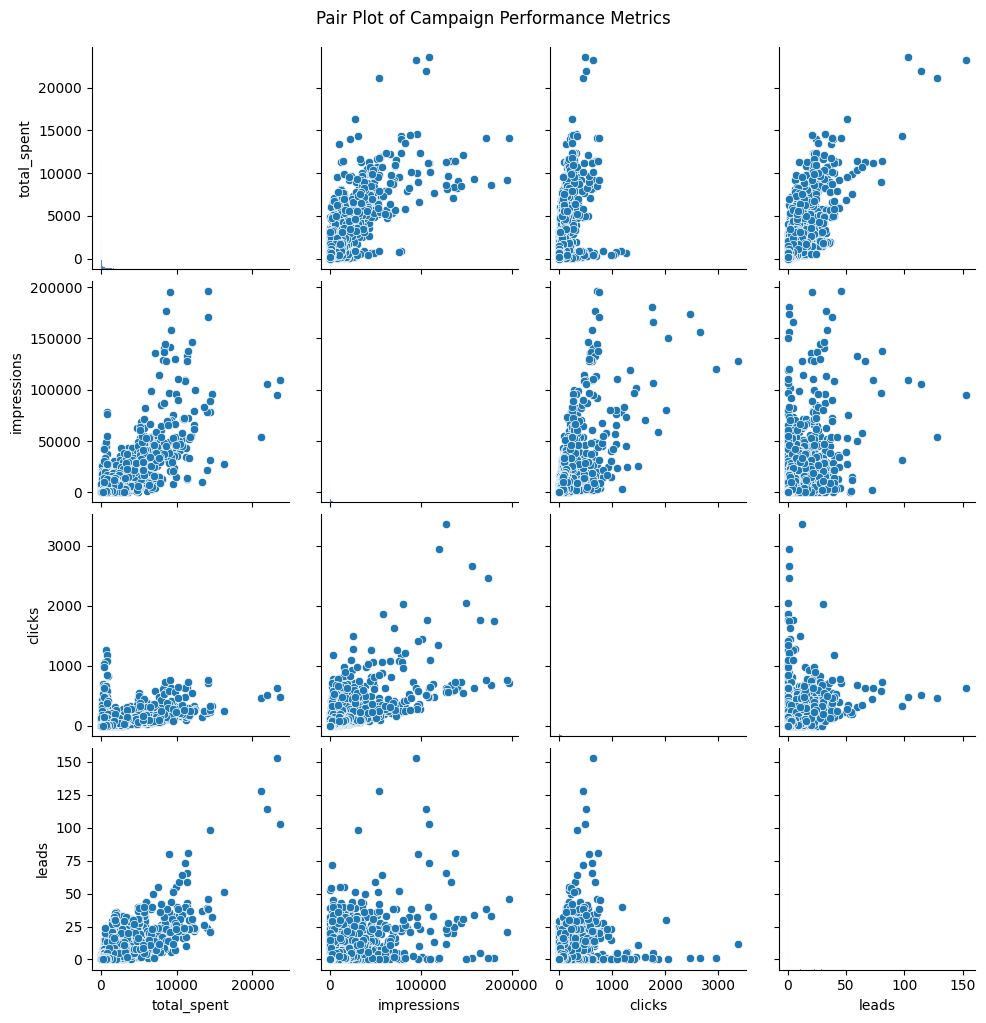

In [36]:
# Pair Plot
sns.pairplot(cleaned_df[['total_spent', 'impressions', 'clicks', 'leads']])
plt.suptitle('Pair Plot of Campaign Performance Metrics', y=1.02)
plt.show()

#This is particularly useful for spotting trends and patterns between the variables.

In [30]:
correlation_matrix = cleaned_df[['clicks', 'impressions', 'total_spent', 'leads']].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                clicks  impressions  total_spent     leads
clicks       1.000000     0.735422     0.673427  0.471200
impressions  0.735422     1.000000     0.817138  0.547306
total_spent  0.673427     0.817138     1.000000  0.798716
leads        0.471200     0.547306     0.798716  1.000000


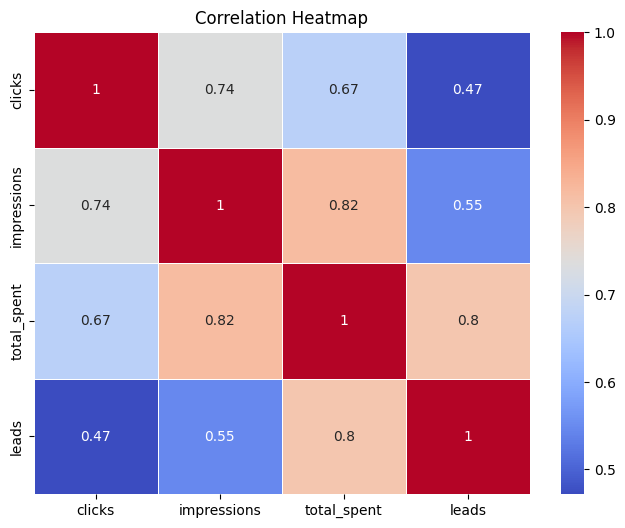

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [21]:
unique_campaign_names = cleaned_df['campaign_name'].unique()
print("Unique Campaign Names:\n", unique_campaign_names)

Unique Campaign Names:
 ['USP_Search_APTNTSKA_250124' 'USP_2_Lead-gen-2_Top4-states_050424'
 'USP Study Abroad_Generic_240224' 'USP_2_Lead-gen-1_220124'
 'USP_MS + Coop Campaign_240224' 'US_Pathway_2_Lead_gen_2_091123'
 'US_Pathway_2_Lead_gen_1_091123' 'US_Pathway_2_Lead_gen_3_241123'
 'US_Pathway_2_Lead_gen_4_220324' 'USP_Webinar2_270324'
 'USP_Program_More-Volume_No Logic_India_220124'
 'USP_Video_APTLTSKA_Lead-Gen_Websites_050324'
 'CBO - USP Masterclass Cold [ 23rd Nov ] - Higher Intent - No Logic new-  India'
 'USP Masterclass Cold [ 31st Oct ] - Higher Intent - No Logic'
 'CBO - USP Masterclass Cold [ 23rd Nov ] - More volume - With Logic'
 'xCBO - USP Masterclass Cold [ 23rd Nov ] - More Volume - No Logic - India-  new link'
 'USP_Webinar_070324'
 'USP_Program_Higher Intent_No Logic_South-states_220124'
 'USP_Marketing+MBA_New Leads Campaign_240224'
 'CBO - USP Masterclass Cold [ 15th Dec ] - More Volume - No Logic - India \x96 New Link'
 'USP_Video_More_Volume_No Logic_India_Ne

In [22]:

def clean_click_through_rate(cleaned_df):
    # Convert to string if not already and clean the click_through_rate column
    cleaned_df['click_through_rate'] = cleaned_df['click_through_rate'].astype(str).str.rstrip('%').astype(float) / 100
    return cleaned_df

def get_campaign_details(cleaned_df):
    # Clean the click_through_rate column
    cleaned_df = clean_click_through_rate(cleaned_df)
    
    campaign_name = input("Enter the campaign name: ")
    
    campaign_data = cleaned_df[cleaned_df['campaign_name'] == campaign_name]
    
    if campaign_data.empty:
        print(f"No data found for campaign: {campaign_name}")
        return
    
    # Calculate the required statistics
    total_clicks = campaign_data['clicks'].sum()
    total_impressions = campaign_data['impressions'].sum()
    average_ctr = campaign_data['click_through_rate'].mean()
    total_spent = campaign_data['total_spent'].sum()
    total_leads = campaign_data['leads'].sum()
    
    # Extract unique platforms
    platforms = campaign_data['platform'].unique()
    
    print(f"Details for campaign: {campaign_name}")
    print(f"Total Clicks: {total_clicks}")
    print(f"Total Impressions: {total_impressions}")
    print(f"Average Click Through Rate (CTR): {average_ctr:.2%}")
    print(f"Total Amount Spent: {total_spent}")
    print(f"Total Leads: {total_leads}")
    print(f"Platforms: {', '.join(platforms)}")

get_campaign_details(cleaned_df)


Enter the campaign name:  USP_Video_ALL-India_Lead-Gen_Keywords_110324


Details for campaign: USP_Video_ALL-India_Lead-Gen_Keywords_110324
Total Clicks: 10896
Total Impressions: 442455
Average Click Through Rate (CTR): 2.67%
Total Amount Spent: 5052.48
Total Leads: 52.0
Platforms: Google


###                                                         Campaigns

In [34]:
# Calculate total spend for each campaign
campaign_spend = cleaned_df.groupby('campaign_name')['total_spent'].sum().reset_index()

# Sort by total spend in descending order
campaign_spend_sorted = campaign_spend.sort_values(by='total_spent', ascending=False)
campaign_spend_sortedd = campaign_spend.sort_values(by='total_spent', ascending=False).head(10)

print("Total Spend for Each Campaign:")
print(campaign_spend_sorted)


Total Spend for Each Campaign:
                                        campaign_name  total_spent
9                     USP Study Abroad_Generic_240224   2126684.24
13                      USP_MS + Coop Campaign_240224   1501040.54
14        USP_Marketing+MBA_New Leads Campaign_240224   1125425.52
34                                 USP_Webinar_070324    752657.01
10                            USP_2_Lead-gen-1_220124    484768.66
37                     US_Pathway_2_Lead_gen_3_241123    263857.63
3   CBO - USP Masterclass Cold [ 23rd Nov ] - More...    254353.16
35                     US_Pathway_2_Lead_gen_1_091123    244777.25
36                     US_Pathway_2_Lead_gen_2_091123    220932.68
6   USP Masterclass Cold [ 31st Oct ] - Higher Int...    205642.99
32      USP_Video_More_Volume_No Logic_India_New Link    198416.23
2   CBO - USP Masterclass Cold [ 23rd Nov ] - High...    196255.37
11                USP_2_Lead-gen-2_Top4-states_050424    194398.53
0   CBO - USP Masterclass Cold 

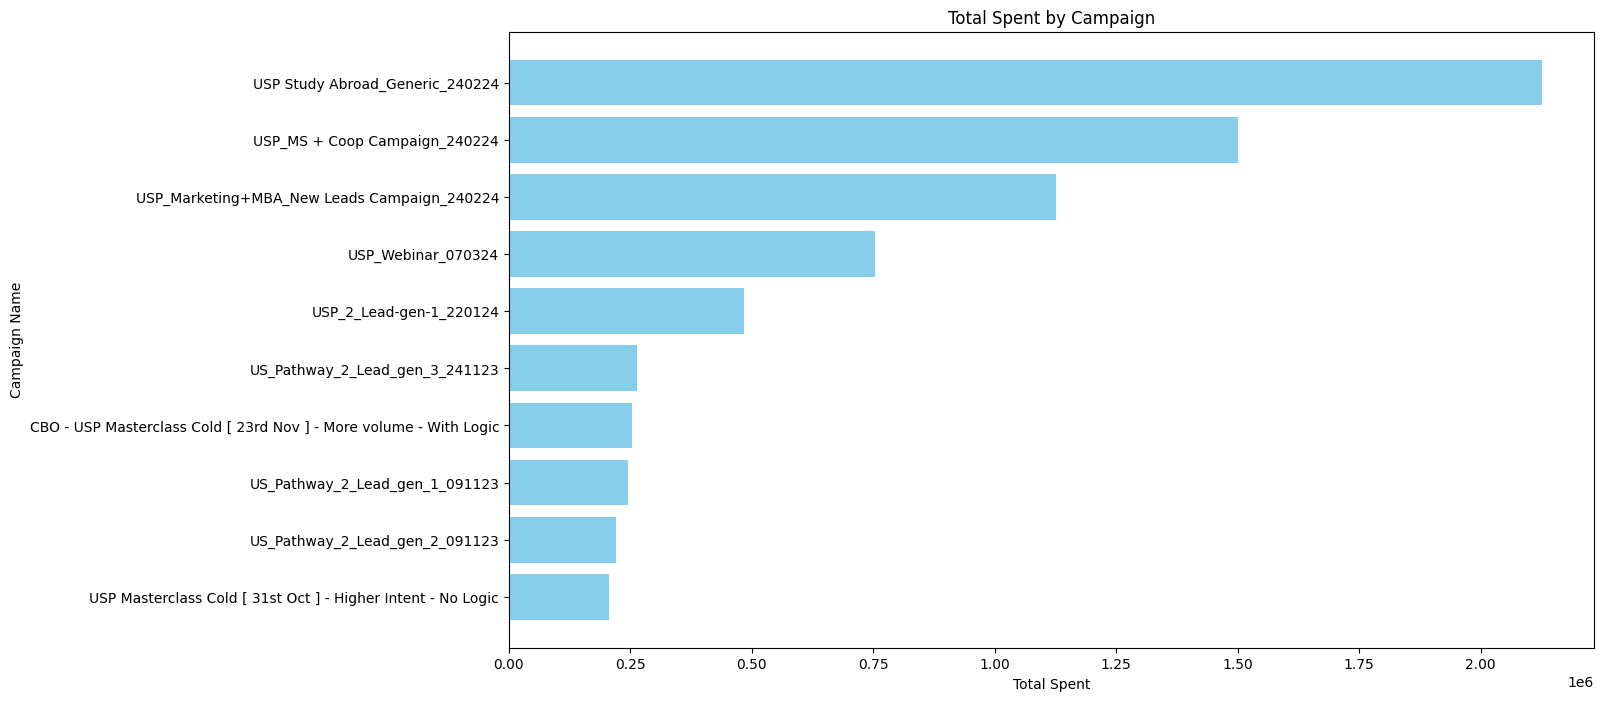

From this chart we can observe the Top 10 campaigns which spent the most.


In [36]:
plt.figure(figsize=(14, 8))
plt.barh(campaign_spend_sortedd['campaign_name'], campaign_spend_sortedd['total_spent'], color='skyblue')
plt.title('Total Spent by Campaign')
plt.xlabel('Total Spent')
plt.ylabel('Campaign Name')
plt.gca().invert_yaxis()
plt.show()

print("From this chart we can observe the Top 10 campaigns which spent the most.")

Campaign Effectiveness Analysis. 
Assess which campaigns are most effective in terms of leads generated.

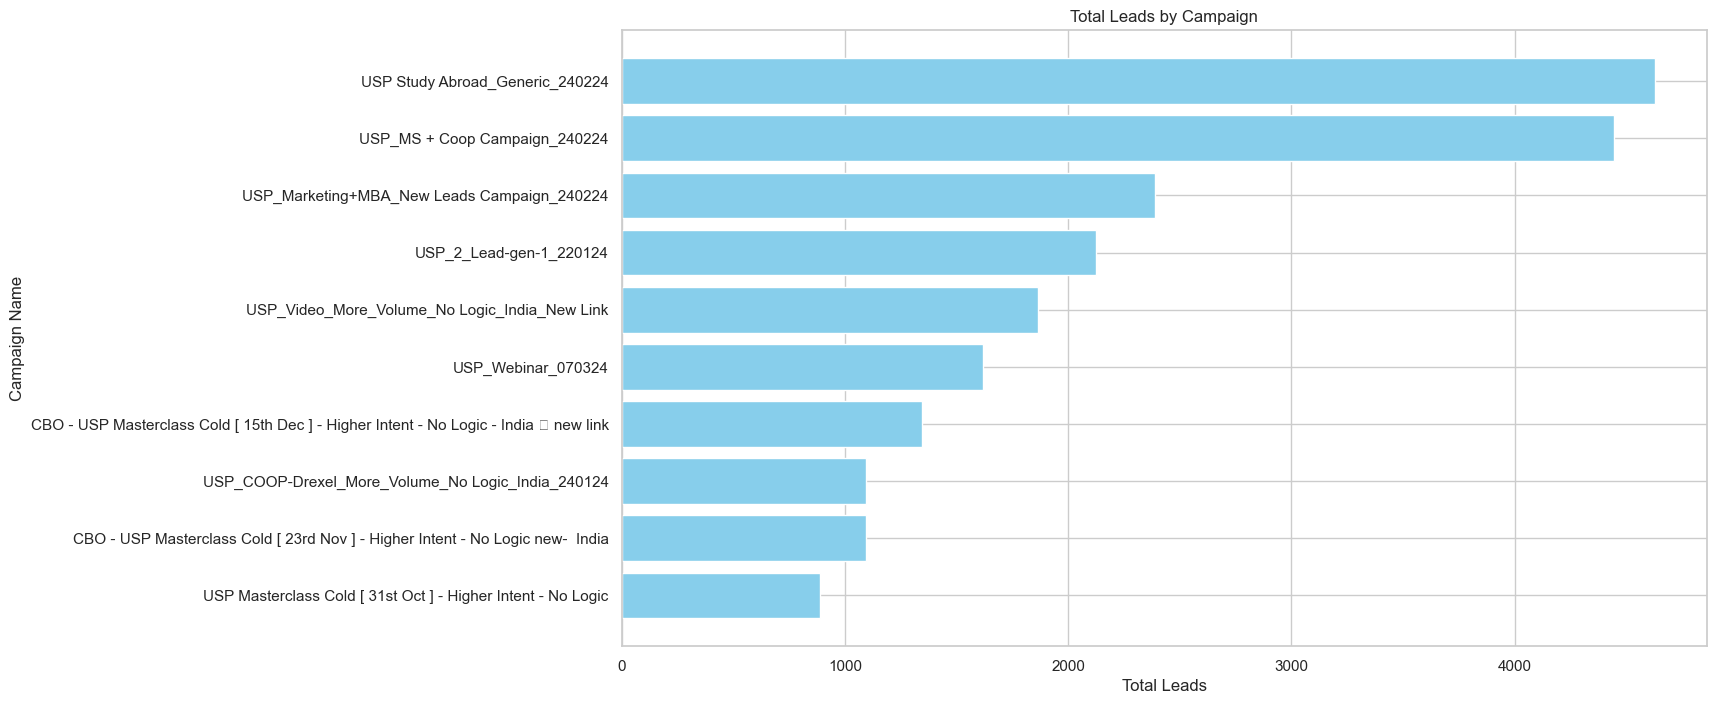

From this chart we can observe the Top 10 campaigns which has most leads.


In [159]:
plt.figure(figsize=(14, 8))
plt.barh(campaign_leads_sortedd['campaign_name'], campaign_leads_sortedd['leads'], color='skyblue')
plt.title('Total Leads by Campaign')
plt.xlabel('Total Leads')
plt.ylabel('Campaign Name')
plt.gca().invert_yaxis()  # To display the highest spend at the top
plt.show()

print("From this chart we can observe the Top 10 campaigns which has most leads.")

In [45]:
campaign_leads = cleaned_df.groupby('campaign_name')['leads'].sum().reset_index()

campaign_leads_sorted = campaign_leads.sort_values(by='leads', ascending=False)
campaign_leads_sortedd = campaign_leads.sort_values(by='leads', ascending=False).head(10)


print("Total Leads for Each Campaign:")
print(campaign_leads_sorted)


Total Leads for Each Campaign:
                                        campaign_name    leads
9                     USP Study Abroad_Generic_240224  4630.00
13                      USP_MS + Coop Campaign_240224  4446.00
14        USP_Marketing+MBA_New Leads Campaign_240224  2390.00
10                            USP_2_Lead-gen-1_220124  2124.00
32      USP_Video_More_Volume_No Logic_India_New Link  1866.00
34                                 USP_Webinar_070324  1616.00
24                         USP_Search_APTNTSKA_250124  1360.00
0   CBO - USP Masterclass Cold [ 15th Dec ] - High...  1346.00
35                     US_Pathway_2_Lead_gen_1_091123  1232.00
12  USP_COOP-Drexel_More_Volume_No Logic_India_240124  1096.00
2   CBO - USP Masterclass Cold [ 23rd Nov ] - High...  1093.00
6   USP Masterclass Cold [ 31st Oct ] - Higher Int...   888.00
37                     US_Pathway_2_Lead_gen_3_241123   874.00
3   CBO - USP Masterclass Cold [ 23rd Nov ] - More...   731.00
36                     U

Creative Performance Analysis


C:\Users\91903\AppData\Local\Temp\ipykernel_25840\3874827.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='click_through_rate', y='campaign_name', data=cleaned_df, ci=None, palette="muted")
C:\Users\91903\AppData\Local\Temp\ipykernel_25840\3874827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='click_through_rate', y='campaign_name', data=cleaned_df, ci=None, palette="muted")
C:\Users\91903\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


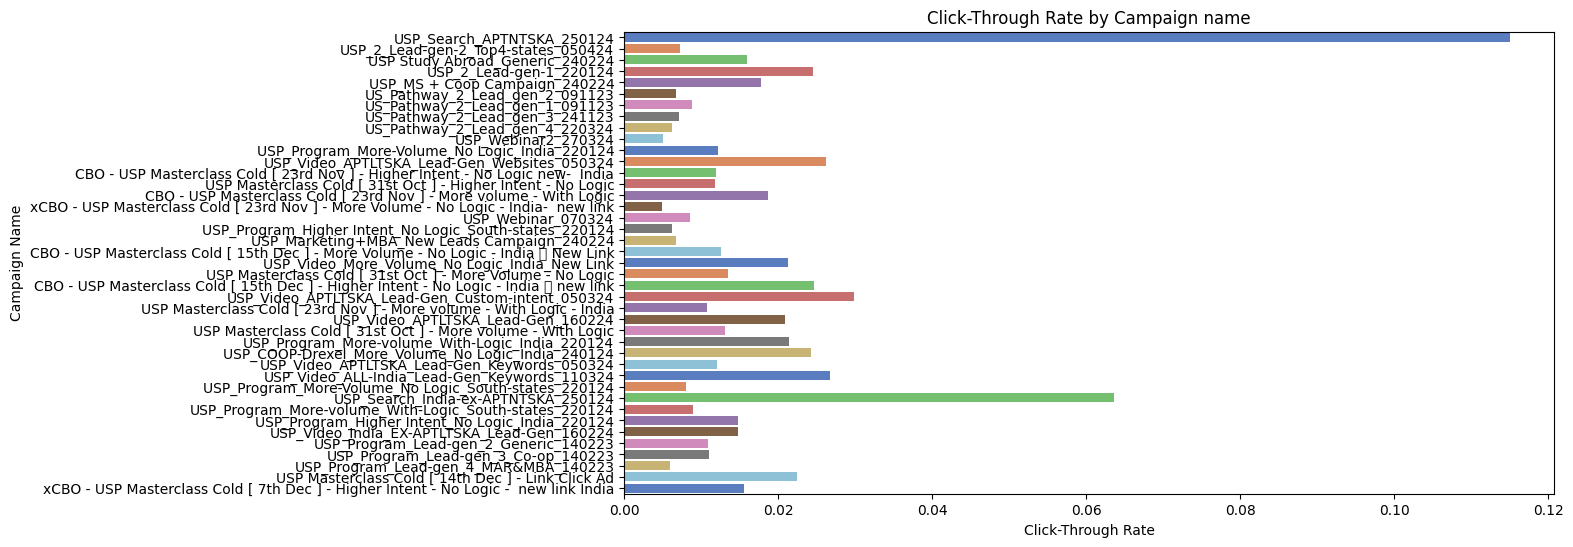

In [41]:
# Creative Performance Analysis: Click-Through Rate by Creative
plt.figure(figsize=(12, 6))
sns.barplot(x='click_through_rate', y='campaign_name', data=cleaned_df, ci=None, palette="muted")
plt.title('Click-Through Rate by Campaign name')
plt.xlabel('Click-Through Rate')
plt.ylabel('Campaign Name')
plt.show()


Audience Segment Performance

In [47]:
campaign_clicks = cleaned_df.groupby('campaign_name')['clicks'].sum().reset_index()

campaign_clicks_sorted = campaign_clicks.sort_values(by='clicks', ascending=False)
campaign_clicks_sortedd = campaign_clicks.sort_values(by='clicks', ascending=False).head(10)


print("Total Clicks for Each Campaign:")
print(campaign_clicks_sorted)

Total Clicks for Each Campaign:
                                        campaign_name  clicks
9                     USP Study Abroad_Generic_240224   48531
14        USP_Marketing+MBA_New Leads Campaign_240224   37727
37                     US_Pathway_2_Lead_gen_3_241123   36201
35                     US_Pathway_2_Lead_gen_1_091123   34923
31        USP_Video_India_EX-APTLTSKA_Lead-Gen_160224   31294
27                 USP_Video_APTLTSKA_Lead-Gen_160224   29492
13                      USP_MS + Coop Campaign_240224   27762
36                     US_Pathway_2_Lead_gen_2_091123   26627
30        USP_Video_APTLTSKA_Lead-Gen_Websites_050324   26065
28   USP_Video_APTLTSKA_Lead-Gen_Custom-intent_050324   25558
24                         USP_Search_APTNTSKA_250124   21663
4   USP Masterclass Cold [ 14th Dec ] - Link Click Ad   18578
34                                 USP_Webinar_070324   16957
29        USP_Video_APTLTSKA_Lead-Gen_Keywords_050324   16799
0   CBO - USP Masterclass Cold [ 15th 

C:\Users\91903\AppData\Local\Temp\ipykernel_25840\896010757.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='clicks', y='campaign_name', data=campaign_clicks_sortedd, ci=None, palette="muted")
C:\Users\91903\AppData\Local\Temp\ipykernel_25840\896010757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='clicks', y='campaign_name', data=campaign_clicks_sortedd, ci=None, palette="muted")


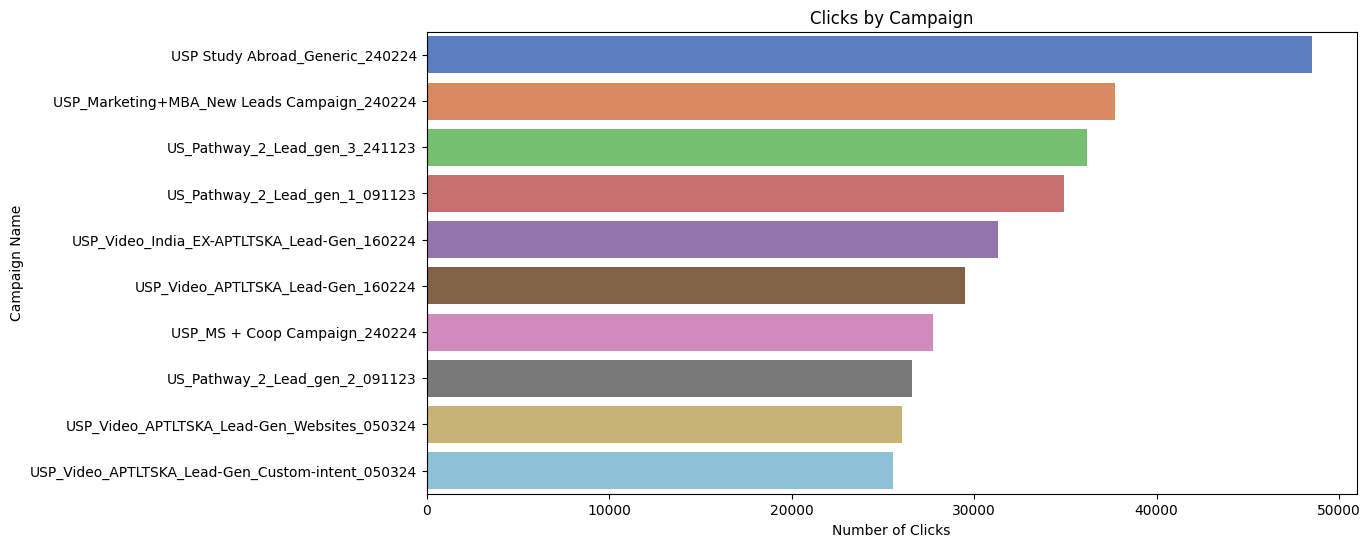

From this chart we can observe the Top 10 campaigns which has most clicks.


In [48]:
# Audience Segment Performance: Clicks by campaigns
plt.figure(figsize=(12, 6))
sns.barplot(x='clicks', y='campaign_name', data=campaign_clicks_sortedd, ci=None, palette="muted")
plt.title('Clicks by Campaign')
plt.xlabel('Number of Clicks')
plt.ylabel('Campaign Name')
plt.show()
print("From this chart we can observe the Top 10 campaigns which has most clicks.")

In [118]:
#Campaign with the most leads
most_leads_campaign = cleaned_df.loc[cleaned_df['clicks'].idxmax()]

#Campaign with the least leads
least_leads_campaign = cleaned_df.loc[cleaned_df['clicks'].idxmin()]

#Campaigns with the most and least leads
print("Campaign with the most leads:")
print(most_leads_campaign)
print("\nCampaign with the least leads:")
print(least_leads_campaign)

Campaign with the most leads:
dates                                               2023-12-16 00:00:00
campaign_name         USP Masterclass Cold [ 14th Dec ] - Link Click Ad
creative_name         #1 ( Graphic ) - Want To Build Your Career In ...
total_spent                                                      623.74
impressions                                                       44959
clicks                                                             1271
click_through_rate                                              2.82702
leads                                                               0.0
platform                                                       Facebook
adset_name                          Related To Study In US [ 14th Dec ]
year_month                                                      2023-12
Name: 9075, dtype: object

Campaign with the least leads:
dates                                         2024-05-02 00:00:00
campaign_name                             USP_2_Lead-g

In [49]:
linkedin_campaigns = cleaned_df[cleaned_df['platform'] == 'LinkedIn']
top_campaigns = linkedin_campaigns.sort_values(by='leads', ascending=False)
top_campaigns = top_campaigns.head(10)
print(top_campaigns[['dates', 'campaign_name', 'platform', 'clicks', 'impressions', 'click_through_rate', 'leads']])

            dates                   campaign_name  platform  clicks  \
15911  12/29/2023  US_Pathway_2_Lead_gen_3_241123  LinkedIn     704   
5472     1/2/2024  US_Pathway_2_Lead_gen_1_091123  LinkedIn     347   
27504   1/17/2024  US_Pathway_2_Lead_gen_1_091123  LinkedIn     304   
23597  12/31/2023  US_Pathway_2_Lead_gen_1_091123  LinkedIn     126   
7786    1/19/2024  US_Pathway_2_Lead_gen_1_091123  LinkedIn     311   
7794    1/30/2024  US_Pathway_2_Lead_gen_1_091123  LinkedIn     333   
7661    1/19/2024  US_Pathway_2_Lead_gen_2_091123  LinkedIn     295   
5476     1/3/2024  US_Pathway_2_Lead_gen_1_091123  LinkedIn     282   
22048  11/24/2023  US_Pathway_2_Lead_gen_1_091123  LinkedIn     171   
27034  11/23/2023  US_Pathway_2_Lead_gen_2_091123  LinkedIn     176   

       impressions  click_through_rate  leads  
15911       113430            0.006206   33.0  
5472         45557            0.007617   16.0  
27504        38458            0.007905   16.0  
23597        18387        

In [50]:
linkedin_campaigns['dates'] = pd.to_datetime(linkedin_campaigns['dates'])

# Group by campaign name and date, and aggregate metrics
performance_by_date = linkedin_campaigns.groupby(['campaign_name', 'dates']).agg({
    'leads': 'sum'
}).reset_index()

# Sort by campaign_name and leads in descending order
sorted_performance = performance_by_date.sort_values(by=['campaign_name', 'leads'], ascending=[True, False])

# Get the top date for each campaign based on the highest number of leads
top_leads_dates = sorted_performance.groupby('campaign_name').head(1)

# Display the top-performing dates for each campaign based on leads
print(top_leads_dates[['campaign_name', 'dates', 'leads']])

                      campaign_name      dates  leads
79   US_Pathway_2_Lead_gen_1_091123 2024-03-08   39.0
144  US_Pathway_2_Lead_gen_2_091123 2023-12-06   22.0
242  US_Pathway_2_Lead_gen_3_241123 2023-12-29   35.0
331  US_Pathway_2_Lead_gen_4_220324 2024-04-04    5.0


C:\Users\91903\AppData\Local\Temp\ipykernel_25840\2017172447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linkedin_campaigns['dates'] = pd.to_datetime(linkedin_campaigns['dates'])


###                                                                Adsets

In [51]:
adsets_count_by_platform = cleaned_df.groupby('platform')['adset_name'].count().reset_index()

adsets_count_by_platform.columns = ['Platform', 'Number of Adsets']

print("Number of Adsets in Each Platform:")
print(adsets_count_by_platform)


Number of Adsets in Each Platform:
   Platform  Number of Adsets
0  Facebook             23496
1    Google               757
2  LinkedIn              3845


In [53]:
adset_metrics = cleaned_df.groupby(['adset_name', 'campaign_name','platform'])[['total_spent', 'impressions', 'clicks', 'leads']].sum().reset_index()
top_10_adsets = adset_metrics.sort_values(by='leads', ascending=False).head(10)
top_10_adsets

,adset_name,campaign_name,platform,total_spent,impressions,clicks,leads
69,MS + Coop All India Ad set - 240224,USP_MS + Coop Campaign_240224,Facebook,647685.15,1901299,13861,2341.0
1,All India Counselling Look-a-like_290224,USP Study Abroad_Generic_240224,Facebook,535064.20,1516258,10984,1884.0
116,USP-2_Data_Job-title_India_exclude_KATNTSAP,USP_2_Lead-gen-1_220124,Facebook,308497.83,1011413,6932,1505.0
72,Marketing+MBA All India - 240224,USP_Marketing+MBA_New Leads Campaign_240224,Facebook,551614.48,4427087,23048,1486.0
4,All India Generic Leads Ad Set_240224,USP Study Abroad_Generic_240224,Facebook,647092.99,3341182,16973,1375.0
70,MS + Coop KA&TN Ad set - 240224,USP_MS + Coop Campaign_240224,Facebook,478504.92,1346976,8000,1352.0
90,Open Targeting - Advantage+ audience [ 7th Dec ],CBO - USP Masterclass Cold [ 15th Dec ] - High...,Facebook,184929.95,599079,12767,1338.0
76,Not Defined,US_Pathway_2_Lead_gen_1_091123,LinkedIn,244777.25,5751255,34923,1232.0
51,GMAT/GRE,USP_Search_APTNTSKA_250124,Google,4545.53,161249,19360,1102.0
7,All India Study abroad Interest 070324,USP_Webinar_070324,Facebook,480984.59,2839529,11106,1028.0


C:\Users\91903\AppData\Local\Temp\ipykernel_25840\3914294477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='leads', y='adset_name', data=top_10_adsets, palette='viridis')


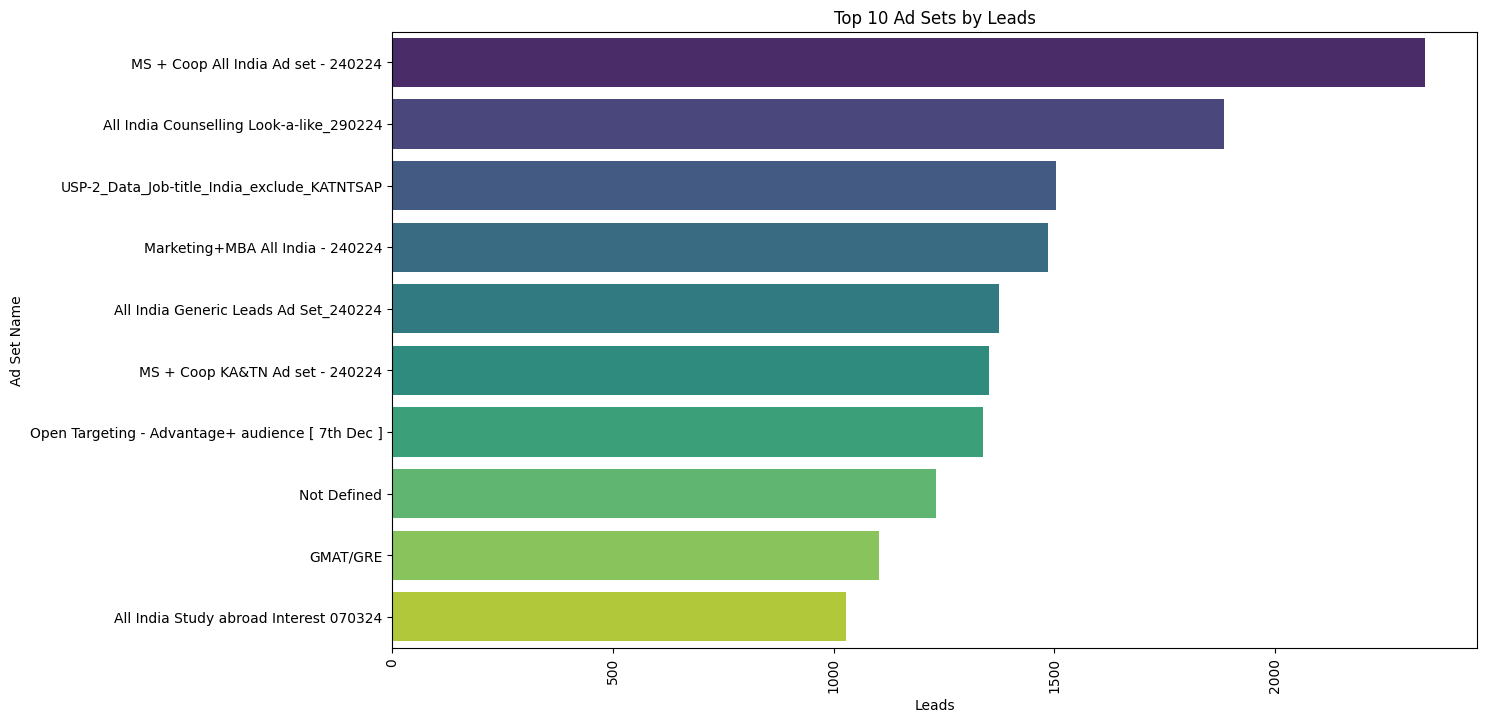

Top 10 Adsets based on the total number of leads.


In [54]:
plt.figure(figsize=(14, 8))
sns.barplot(x='leads', y='adset_name', data=top_10_adsets, palette='viridis')
plt.title('Top 10 Ad Sets by Leads')
plt.xlabel('Leads')
plt.ylabel('Ad Set Name')
plt.xticks(rotation=90)
plt.show()

print("Top 10 Adsets based on the total number of leads.")

In [33]:
cleaned_df['creative_name'] = cleaned_df['creative_name'].replace(' --', 'Not Defined')
print(cleaned_df[['creative_name']].head())

                      creative_name
0                       Not Defined
1  #7 ( Graphic ) - Get A Free Pass
2          USP_S3_never-been-easier
3                USP_S4_Do-you-have
4               USP_S1_We-guarantee


In [75]:
cleaned_df['click_through_rate'] = pd.to_numeric(cleaned_df['click_through_rate'], errors='coerce')

# Calculate the average CTR and total leads for each creative
creative_performance = cleaned_df.groupby('adset_name').agg({
    'click_through_rate': 'mean',
}).reset_index()

top_adset_ctr = creative_performance.sort_values(by='click_through_rate', ascending=False)

# Get top 10 creatives by CTR
top_10_adset_ctr = top_adset_ctr.head(10)

print("Top 10 Adsets by CTR:")
print(top_10_adset_ctr)

Top 10 Adsets by CTR:
                                     adset_name  click_through_rate
16                             Dual Course Work            0.253727
17                             Dual Course work            0.237207
63                                 Study Abroad            0.178061
33                                     GMAT/GRE            0.081046
47                               Masters abroad            0.061545
46                               Masters Abroad            0.053251
49         Open Targeting - Advantage+ audience            0.042200
1      All India Counselling Look-a-like_290224            0.037658
66  USP-2_Data_Job-title_India_exclude_KATNTSAP            0.030729
15                      Custom-Intent_Targeting            0.029846


C:\Users\91903\AppData\Local\Temp\ipykernel_25840\1350858958.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='click_through_rate', y='adset_name', data=top_10_adset_ctr, palette="viridis")


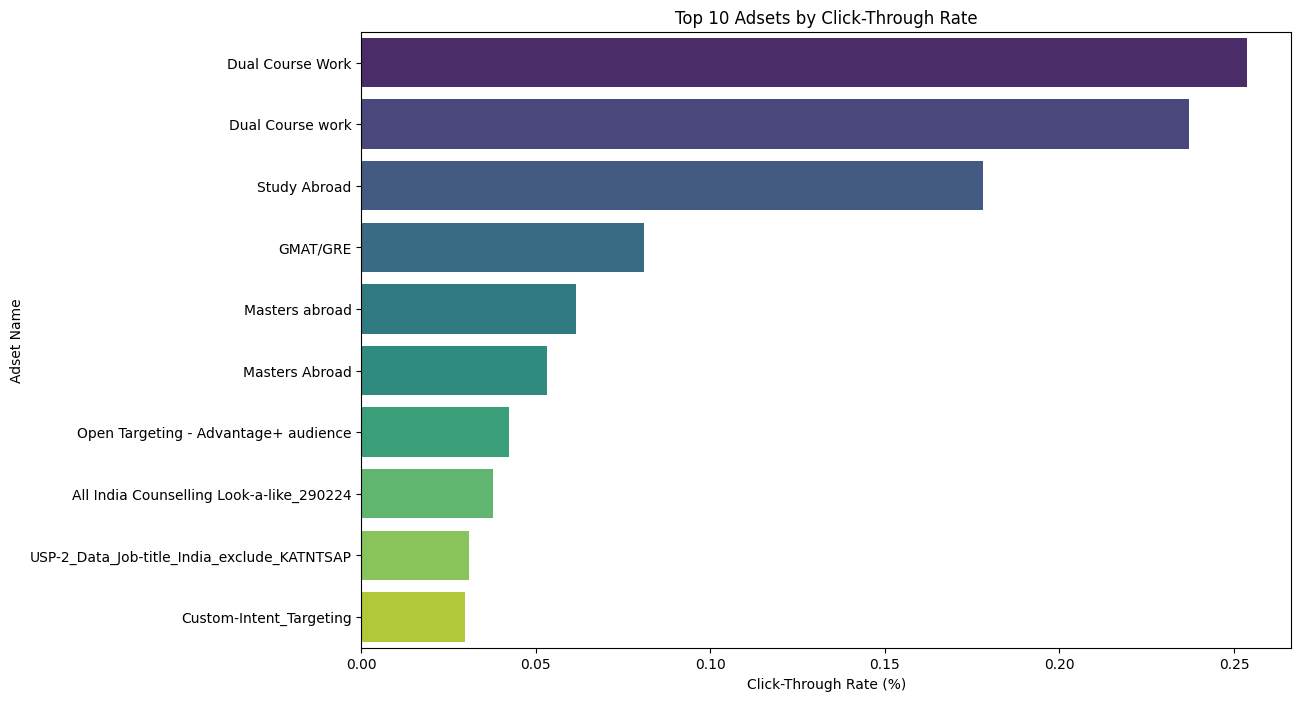

Top 10 Adsets based on the click thorugh rate.


In [72]:
plt.figure(figsize=(12, 8))
sns.barplot(x='click_through_rate', y='adset_name', data=top_10_adset_ctr, palette="viridis")
plt.title('Top 10 Adsets by Click-Through Rate')
plt.xlabel('Click-Through Rate (%)')
plt.ylabel('Adset Name')
plt.show()

print("Top 10 Adsets based on the click thorugh rate.")

                                                                   Platforms

In [88]:
unique_campaign_count = cleaned_df['campaign_name'].nunique()
print(f"Number of Unique Campaigns: {unique_campaign_count}")


Number of Unique Campaigns: 41


C:\Users\91903\AppData\Local\Temp\ipykernel_25840\797967155.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Platform', y='Campaign Count', data=campaign_counts_by_platform, palette='viridis')


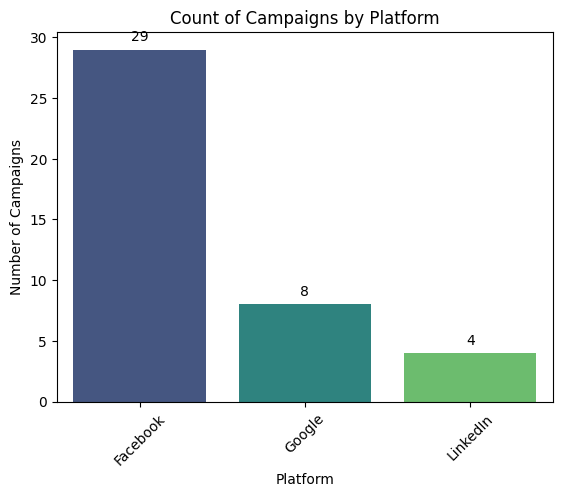

In [89]:
campaign_counts_by_platform = cleaned_df.groupby('platform')['campaign_name'].nunique().reset_index()
campaign_counts_by_platform.columns = ['Platform', 'Campaign Count']

ax = sns.barplot(x='Platform', y='Campaign Count', data=campaign_counts_by_platform, palette='viridis')

# Add title and labels
plt.title('Count of Campaigns by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Campaigns')
plt.xticks(rotation=45)

# Add labels on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center',
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

In [65]:
cleaned_df['conversion_rate'] = cleaned_df['leads'] / cleaned_df['clicks'] * 100

C:\Users\91903\AppData\Local\Temp\ipykernel_21120\3801132527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['conversion_rate'] = cleaned_df['leads'] / cleaned_df['clicks'] * 100


In [70]:
cleaned_df = cleaned_df[cleaned_df['clicks'] > 0]
platform_conversion_rate = cleaned_df.groupby('platform')['conversion_rate'].mean().reset_index()
platform_conversion_rate = platform_conversion_rate.sort_values(by='conversion_rate', ascending=False)
platform_conversion_rate

,platform,conversion_rate
0,Facebook,23.807248
2,LinkedIn,15.536159
1,Google,5.631277


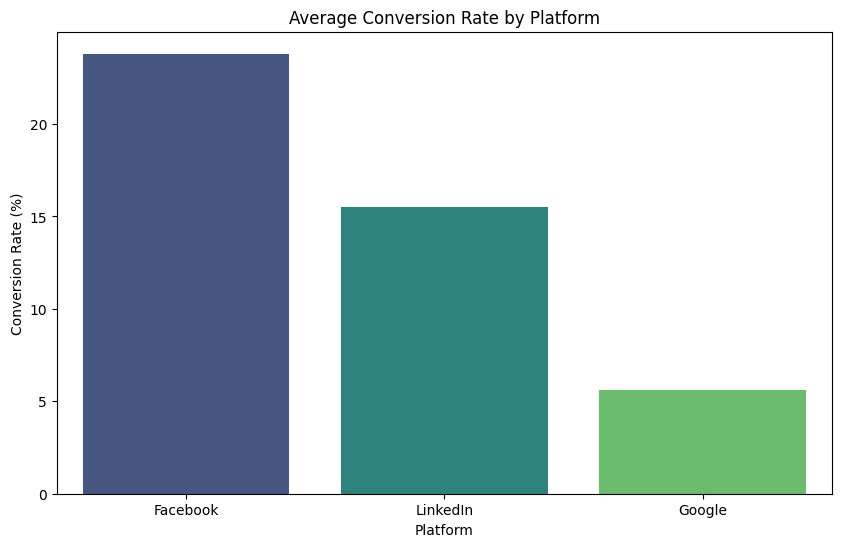

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='conversion_rate', hue='platform', data=platform_conversion_rate, palette='viridis', dodge=False, legend=False)
plt.title('Average Conversion Rate by Platform')
plt.xlabel('Platform')
plt.ylabel('Conversion Rate (%)')
plt.show()

In [59]:
cleaned_df['cost_per_lead'] = cleaned_df['total_spent'] / cleaned_df['leads']
platform_cost_per_lead = cleaned_df.groupby('platform')['cost_per_lead'].mean().reset_index()
platform_cost_per_lead = platform_cost_per_lead.sort_values(by='cost_per_lead', ascending=False)
platform_cost_per_lead

C:\Users\91903\AppData\Local\Temp\ipykernel_21120\3391829154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['cost_per_lead'] = cleaned_df['total_spent'] / cleaned_df['leads']


,platform,cost_per_lead
2,LinkedIn,492.651095
1,Google,342.198012
0,Facebook,331.488723


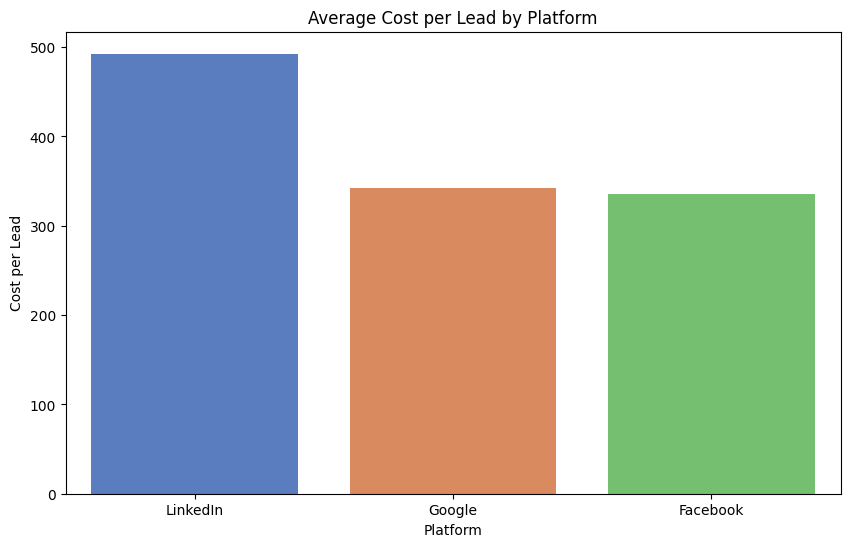

In [76]:
platform_cost_per_lead = cleaned_df.groupby('platform')['cost_per_lead'].mean().reset_index()

# Sort by cost per lead for better visualization
platform_cost_per_lead = platform_cost_per_lead.sort_values(by='cost_per_lead', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='cost_per_lead', hue='platform', data=platform_cost_per_lead, palette='muted', dodge=False, legend=False)
plt.title('Average Cost per Lead by Platform')
plt.xlabel('Platform')
plt.ylabel('Cost per Lead')
plt.show()

In [54]:
platform_spent = cleaned_df.groupby('platform')['total_spent'].sum().reset_index()

platform_spent_sorted = platform_spent.sort_values(by='total_spent', ascending=False)

print("Total Spent by Each Platform:")
print(platform_spent_sorted)


Total Spent by Each Platform:
   platform  total_spent
0  Facebook   8970978.34
2  LinkedIn    813476.26
1    Google    130151.84


C:\Users\91903\AppData\Local\Temp\ipykernel_23648\2747753208.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='platform', y='total_spent', data=platform_totals, ci=None, palette="muted")
C:\Users\91903\AppData\Local\Temp\ipykernel_23648\2747753208.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='platform', y='total_spent', data=platform_totals, ci=None, palette="muted")


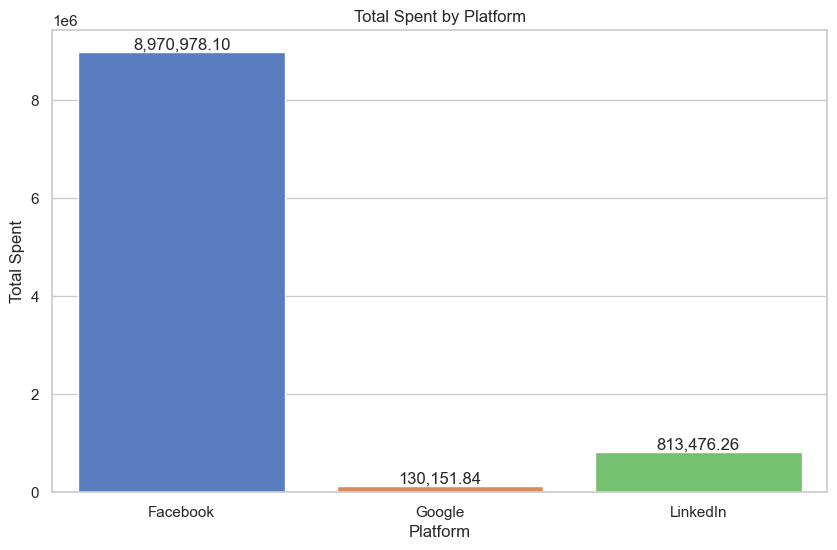

As we can see that Facebook has spent the most amount follwed by Linkedin and Google.


In [164]:
platform_totals = cleaned_df.groupby('platform')['total_spent'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='platform', y='total_spent', data=platform_totals, ci=None, palette="muted")

# Displaying sum on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Total Spent by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Spent')
plt.show()

print("As we can see that Facebook has spent the most amount follwed by Linkedin and Google.")

In [46]:
# Find the campaign with the most leads
most_leads_campaign = cleaned_df.loc[cleaned_df['total_spent'].idxmax()]

# Find the campaign with the least leads
least_leads_campaign = cleaned_df.loc[cleaned_df['total_spent'].idxmin()]

# Print the campaigns with the most and least leads
print("Campaign with the most leads:")
print(most_leads_campaign)

print("\nCampaign with the least leads:")
print(least_leads_campaign)

Campaign with the most leads:
dates                                           3/19/2024
campaign_name               USP_MS + Coop Campaign_240224
creative_name                           USP_RIT_1_Getpaid
total_spent                                      23593.24
impressions                                        109101
clicks                                                487
click_through_rate                               0.004464
leads                                               103.0
platform                                         Facebook
adset_name            MS + Coop All India Ad set - 240224
Name: 15779, dtype: object

Campaign with the least leads:
dates                                             4/24/2024
campaign_name               USP Study Abroad_Generic_240224
creative_name                      USP_S3_never-been-easier
total_spent                                             0.0
impressions                                               2
clicks                         

5. Budget Allocation Optimization

In [47]:
cleaned_df['leads'] = cleaned_df['leads'].astype(int)


C:\Users\91903\AppData\Local\Temp\ipykernel_23648\3280903109.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='platform', y='leads', data=platform_leads, ci=None, palette="muted")
C:\Users\91903\AppData\Local\Temp\ipykernel_23648\3280903109.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='platform', y='leads', data=platform_leads, ci=None, palette="muted")


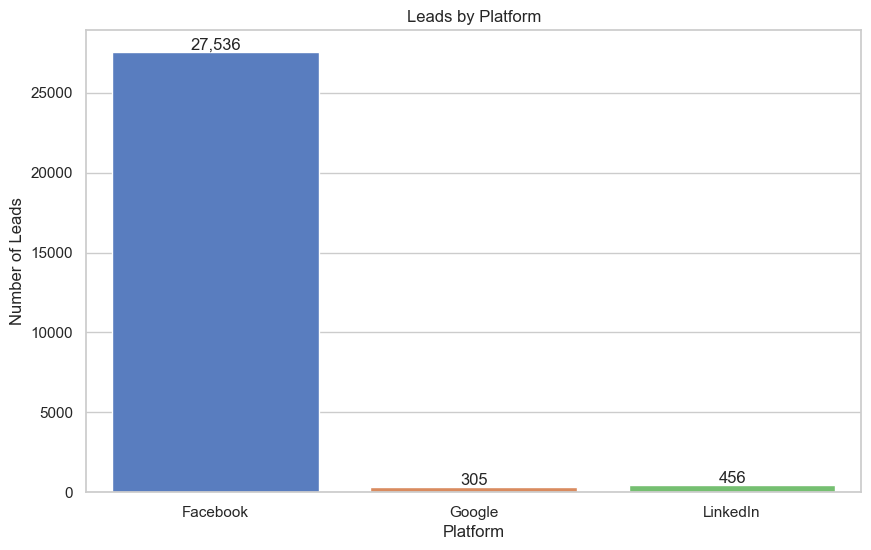

Facebook has provided most number of leads as it has spent the most amount.


In [165]:
platform_leads = cleaned_df.groupby('platform')['leads'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='platform', y='leads', data=platform_leads, ci=None, palette="muted")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Leads by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Leads')
plt.show()

print("Facebook has provided most number of leads as it has spent the most amount.")

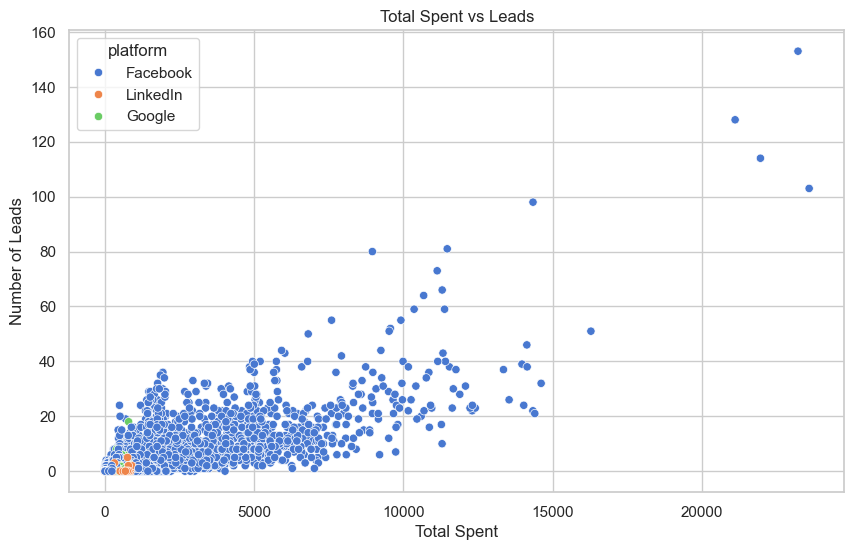

In [151]:
# ROI and Cost Analysis: Total Spent vs Leads
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_spent', y='leads', data=cleaned_df, hue='platform', palette="muted")
plt.title('Total Spent vs Leads')
plt.xlabel('Total Spent')
plt.ylabel('Number of Leads')
plt.show()

print("This scatter plot displays the relationship between two continuous variables which are leads and spent by plotting data points on a two-dimensional grid. These are differentiated by platforms")

6. ROI and Cost Analysis
 Calculate the return on investment (ROI) and analyze the cost-effectiveness of different platforms.

In [49]:
# Find the campaign with the most leads
most_leads_campaign = cleaned_df.loc[cleaned_df['leads'].idxmax()]

# Find the campaign with the least leads
least_leads_campaign = cleaned_df.loc[cleaned_df['leads'].idxmin()]

# Print the campaigns with the most and least leads
print("Campaign with the most leads:")
print(most_leads_campaign)

print("\nCampaign with the least leads:")
print(least_leads_campaign)

Campaign with the most leads:
dates                                           3/20/2024
campaign_name               USP_MS + Coop Campaign_240224
creative_name                           USP_RIT_1_Getpaid
total_spent                                       23219.6
impressions                                         95212
clicks                                                638
click_through_rate                               0.006701
leads                                                 153
platform                                         Facebook
adset_name            MS + Coop All India Ad set - 240224
Name: 21531, dtype: object

Campaign with the least leads:
dates                                            5/2/2024
campaign_name         USP_2_Lead-gen-2_Top4-states_050424
creative_name                    USP_S3_never-been-easier
total_spent                                         170.4
impressions                                          2695
clicks                                   

C:\Users\91903\AppData\Local\Temp\ipykernel_23648\2842020890.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='platform', y='clicks', data=platform_totals, ci=None, palette="muted")
C:\Users\91903\AppData\Local\Temp\ipykernel_23648\2842020890.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='platform', y='clicks', data=platform_totals, ci=None, palette="muted")


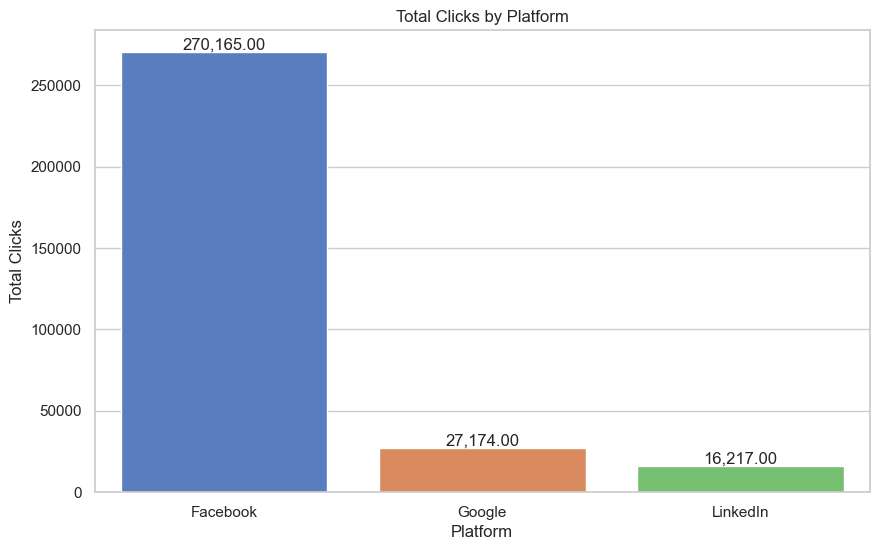

In [138]:
platform_totals = cleaned_df.groupby('platform')['clicks'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='platform', y='clicks', data=platform_totals, ci=None, palette="muted")

# Displaying sum on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Total Clicks by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Clicks')
plt.show()


C:\Users\91903\AppData\Local\Temp\ipykernel_23648\1256433376.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='platform', y='impressions', data=platform_totals, ci=None, palette="muted")
C:\Users\91903\AppData\Local\Temp\ipykernel_23648\1256433376.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='platform', y='impressions', data=platform_totals, ci=None, palette="muted")


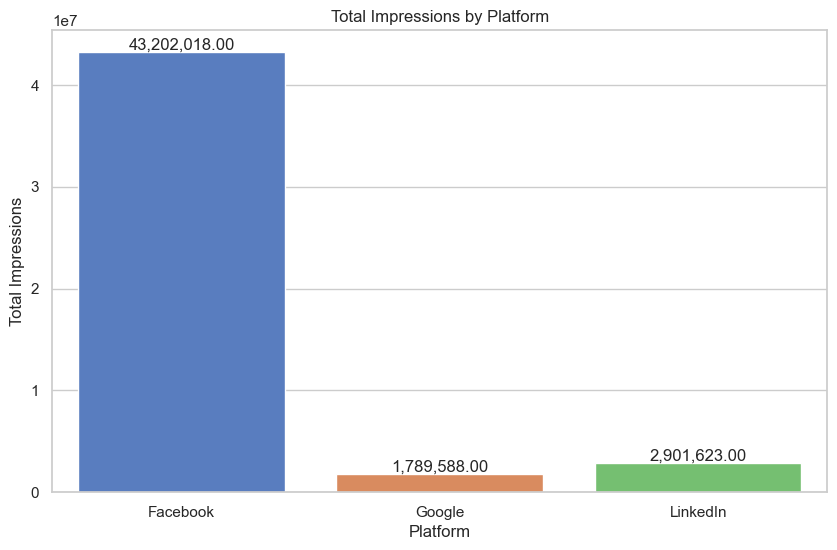

In [148]:
platform_totals = cleaned_df.groupby('platform')['impressions'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='platform', y='impressions', data=platform_totals, ci=None, palette="muted")

# Displaying sum on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Total Impressions by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Impressions')
plt.show()


In [150]:
platforms = cleaned_df.groupby(['platform', 'campaign_name','adset_name'])[['total_spent', 'impressions', 'clicks', 'leads']].sum().reset_index()
top_platforms = platforms.sort_values(by='leads', ascending=False).head(10)
top_platforms

,platform,campaign_name,adset_name,total_spent,impressions,clicks,leads
52,Facebook,USP_MS + Coop Campaign_240224,MS + Coop All India Ad set - 240224,647685.15,1901299,13861,2341.0
36,Facebook,USP Study Abroad_Generic_240224,All India Counselling Look-a-like_290224,535064.20,1516258,10984,1884.0
43,Facebook,USP_2_Lead-gen-1_220124,USP-2_Data_Job-title_India_exclude_KATNTSAP,308497.83,1011413,6932,1505.0
55,Facebook,USP_Marketing+MBA_New Leads Campaign_240224,Marketing+MBA All India - 240224,551614.48,4427087,23048,1486.0
38,Facebook,USP Study Abroad_Generic_240224,All India Generic Leads Ad Set_240224,647092.99,3341182,16973,1375.0
53,Facebook,USP_MS + Coop Campaign_240224,MS + Coop KA&TN Ad set - 240224,478504.92,1346976,8000,1352.0
2,Facebook,CBO - USP Masterclass Cold [ 15th Dec ] - High...,Open Targeting - Advantage+ audience [ 7th Dec ],184929.95,599079,12767,1338.0
91,Facebook,USP_Webinar_070324,All India Study abroad Interest 070324,480984.59,2839529,11106,1028.0
85,Facebook,USP_Video_More_Volume_No Logic_India_New Link,Open Targeting - Advantage+ audience,55359.97,308755,5296,950.0
51,Facebook,USP_MS + Coop Campaign_240224,MS + Coop AP&TS Ad set - 240224,374850.47,1258107,5901,753.0


Click-Through Rate by Platform:
   platform  click_through_rate
1    Google            4.044725
0  Facebook            1.406871
2  LinkedIn            0.751902


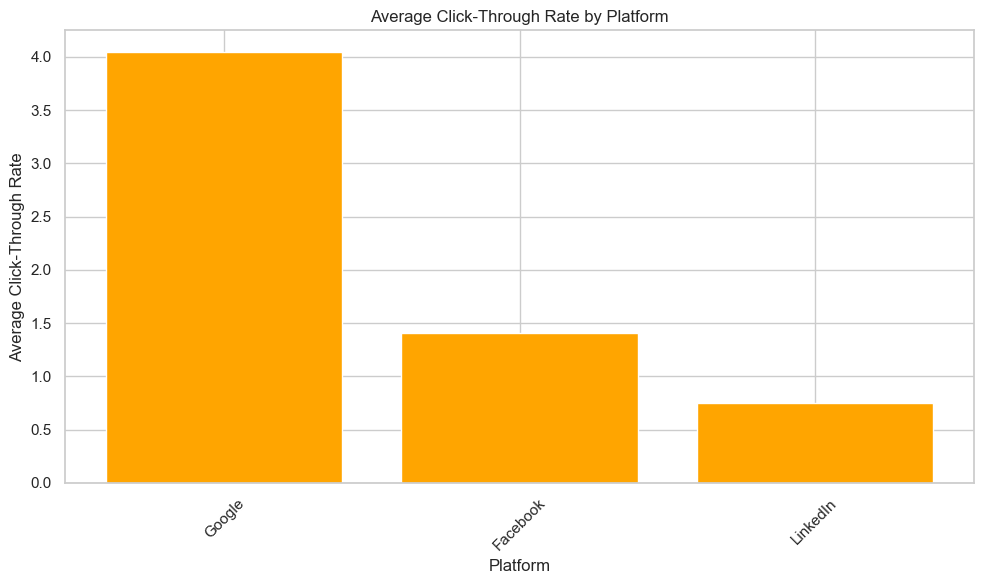

This plot shows the average click through rate on each platform.


In [57]:
platform_ctr = cleaned_df.groupby('platform')['click_through_rate'].mean().reset_index()

platform_ctr_sorted = platform_ctr.sort_values(by='click_through_rate', ascending=False)

print("Click-Through Rate by Platform:")
print(platform_ctr_sorted)

plt.figure(figsize=(10, 6))
plt.bar(platform_ctr_sorted['platform'], platform_ctr_sorted['click_through_rate'], color='orange')
plt.xlabel('Platform')
plt.ylabel('Average Click-Through Rate')
plt.title('Average Click-Through Rate by Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("This plot shows the average click through rate on each platform.")

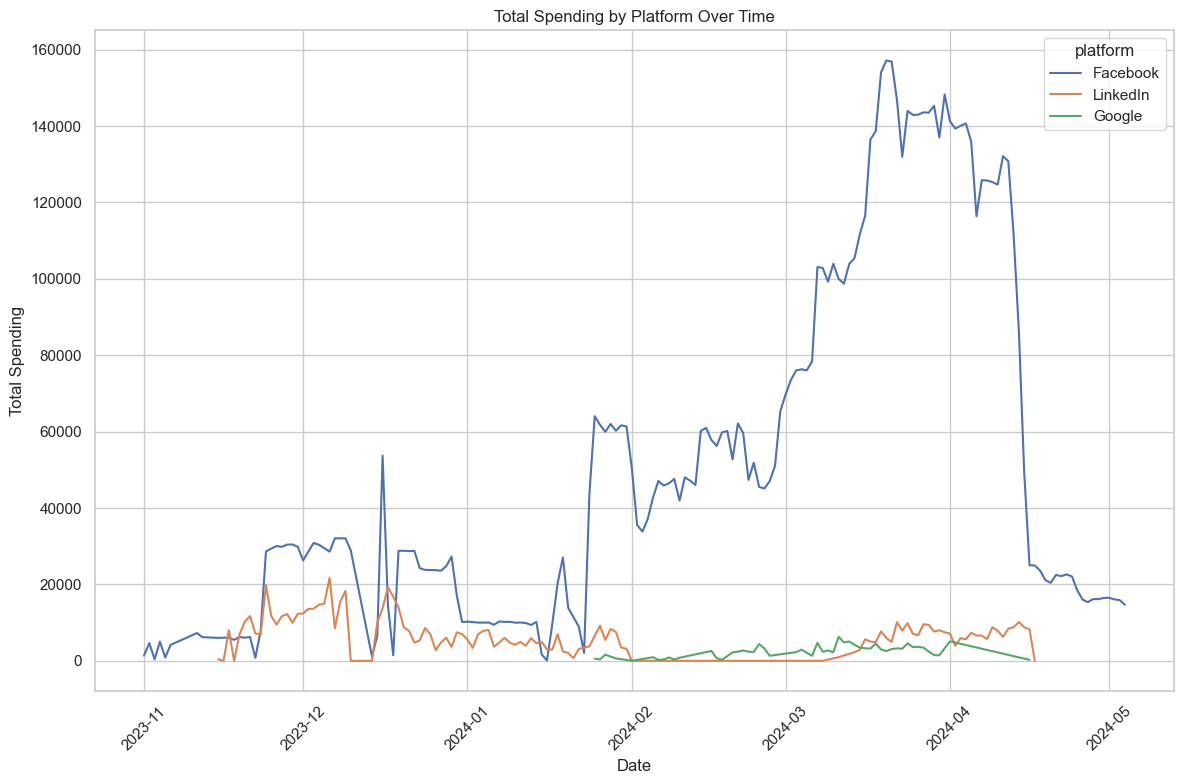

This line chart shows total spending over time period.


In [198]:
cleaned_df['dates'] = pd.to_datetime(cleaned_df['dates'])

spending_by_date = cleaned_df.groupby(['dates', 'platform'])['total_spent'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=spending_by_date, x='dates', y='total_spent', hue='platform')
plt.xlabel('Date')
plt.ylabel('Total Spending')
plt.title('Total Spending by Platform Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("This line chart shows total spending over time period.")

                                                                 Dates

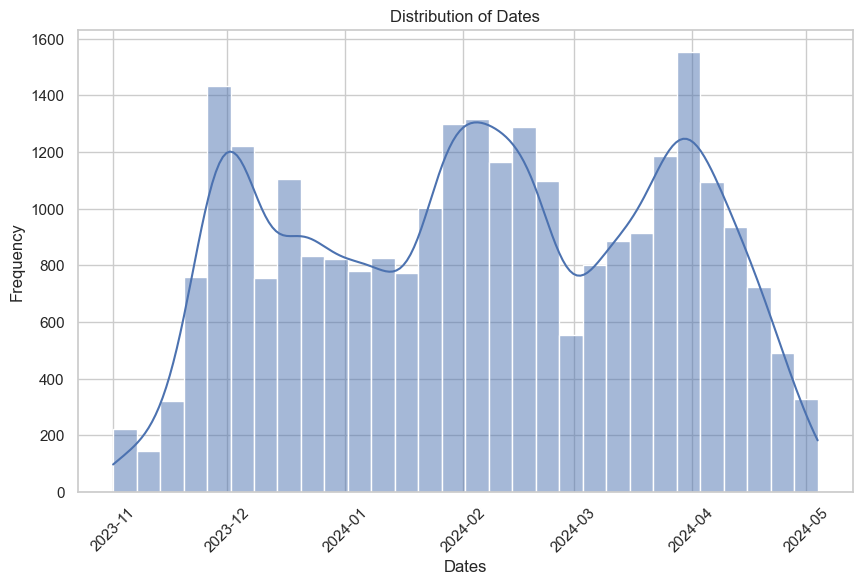

In this distribution of dates across the dataset, we can see that most campaigns were in the months of December,February and April.


In [200]:
# Dates
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['dates'], bins=30, kde=True)
plt.title('Distribution of Dates')
plt.xlabel('Dates')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

print("In this distribution of dates across the dataset, we can see that most campaigns were in the months of December,February and April.")

In [83]:
cleaned_df.to_csv('cleaned_data.csv', index=False)
